In [531]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

import factors
import metrics
from metrics import evaluate_strategy, calculate_cumulative_asset
from trading_signal import long_short_strategy, vol_long_short_strategy


In [267]:
import importlib
import metrics

importlib.reload(metrics)
from metrics import evaluate_strategy, calculate_cumulative_asset

In [192]:
import importlib
import factors

importlib.reload(factors)

<module 'factors' from '/Users/zoer/Documents/QTS/Crypto_trading_technical_indicators/factors.py'>

## Data Preparation

In [201]:
BTC = pd.read_pickle("data/cpt_5min/k_data/BTCUSD.pkl")

# Function to convert string columns to float
def convert_string_to_float(df):
    # Identify columns with string (object) data type
    string_columns = [col for col in df.columns if df[col].dtype == 'object']
    
    # Convert string columns to float where possible
    for col in string_columns:
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float, set errors to NaN if conversion fails
        except Exception as e:
            print(f"Error converting column {col} to float: {e}")
    
    return df

# Convert string columns to float
BTC = convert_string_to_float(BTC)

In [534]:
import importlib
import picture

importlib.reload(picture)

<module 'picture' from '/Users/zoer/Documents/QTS/Crypto_trading_technical_indicators/picture.py'>

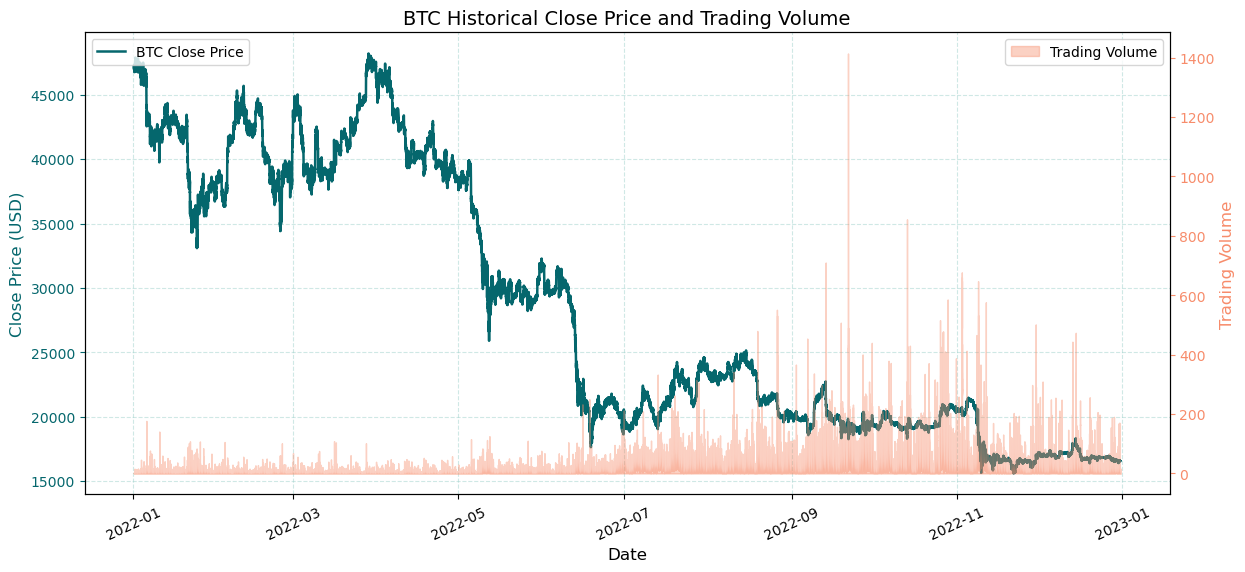

In [205]:
picture.plot_btc_price_and_volume(BTC)

This chart shows the historical **BTC closing price** (dark teal line) and **trading volume** (light orange bars) over the course of 2022. 

### Key Observations:
1. **Downward Trend in BTC Price**  
   - Bitcoin started the year around **$45,000** but saw a consistent **decline**, dropping below **$20,000** by mid-year and stabilizing around **$16,000 - $17,000** by year-end.
   - This downtrend aligns with **tightening monetary policy** by the U.S. Federal Reserve, including aggressive **interest rate hikes** to combat inflation, reducing liquidity in risk assets like BTC.

2. **Trading Volume Fluctuations**  
   - Early 2022 shows **low and stable** trading volumes.
   - A **significant increase** in trading activity is noticeable after May 2022, corresponding with **BTC's price collapse**.
   - This surge in volume may be linked to major **market events** such as:
     - **Terra (LUNA) collapse (May 2022)** – A major DeFi crash that led to cascading liquidations.
     - **Celsius & 3AC Crisis (June-July 2022)** – The insolvency of major crypto lenders, causing forced BTC liquidations.
     - **FTX Collapse (November 2022)** – One of the biggest centralized crypto exchanges filed for bankruptcy, leading to panic selling.

3. **Market Stabilization Towards Year-End**  
   - BTC price remains relatively **stable from November onwards**, hovering around **$16,000 - $17,000**.
   - Trading volume, however, remains elevated compared to early 2022, possibly indicating **accumulation by institutional investors** or continued **market uncertainty**.

### Economic Context:  
- The **macro environment** in 2022 was extremely challenging for crypto assets due to:
  - **High inflation (CPI above 8%)**, forcing central banks to tighten monetary policy.
  - **Rising interest rates**, which made speculative assets like BTC less attractive.
  - **Strong U.S. dollar (DXY spike)**, which pressured BTC and other risk assets lower.
  - **Crypto-specific contagion**, reducing investor confidence in DeFi and centralized exchanges.

Overall, this chart captures **one of the most challenging years in BTC history**, characterized by **macro-driven selling, liquidity crises, and capitulation events** before a period of stabilization.

## Technique Indicator Analysis

In [215]:
start = "2022-01-01 06:00:00"
end = "2022-12-31 06:00:00"

df_indicators_notrend = factors.compute_technical_indicators(BTC, start, end)
df_indicators_notrend = factors.restructure_dataframe(df_indicators_notrend)

df_cleaned = df_indicators_notrend.dropna(axis=1, how="all")  # 删除全是 NaN 的列
df_cleaned = df_cleaned.loc[:, df_cleaned.nunique() > 1]  # 删除只有单一值的列

In [216]:
d = df_cleaned.describe()
d

Category Overlap Studies                                                       \
Factor       BBAND WIDTH BBAND UPPER SIGNAL BBAND LOWER SIGNAL            RSI   
count      104808.000000             104827             104827  104826.000000   
unique     104798.000000                  2                  2  104765.000000   
top            16.846756                  0                  0      61.475744   
freq            2.000000              99137              98513       9.000000   

Category                                                                      \
Factor             DEMA         EMA    H TRENDLINE           KMAM   MIDPOINT   
count     104789.000000  104808.000  104764.000000  104817.000000  104814.00   
unique    104789.000000  104808.000  104764.000000  104817.000000   50445.00   
top        47192.896103   47088.527   47014.331547   47100.025017   19199.16   
freq           1.000000       1.000       1.000000       1.000000      17.00   

Category            ... Pattern Recognition                         \
Factor    MIDPRICE  ...    CDLSTICKSANDWICH CDLTAKURI CDLTASUKIGAP   
count     104814.0  ...              104827    104827       104827   
unique     53492.0  ...                   2         2            3   
top        19494.0  ...                   0         0            0   
freq          17.0  ...              104712    102759       104549   

Category                                                                      \
Factor   CDLTHRUSTING CDLUNIQUE3RIVER CDLUPSIDEGAP2CROWS CDLXSIDEGAP3METHODS   
count          104827          104827             104827              104827   
unique              2               2                  2                   3   
top                 0               0                  0                   0   
freq           104413          104727             104822              103581   

Category Cycle Indicators                           
Factor         HTDCPERIOD     HT DCPHASE TRENDMODE  
count       104795.000000  104764.000000    104827  
unique      104795.000000  104764.000000         2  
top             15.646696      -6.557202         0  
freq             1.000000       1.000000     62951  

[4 rows x 121 columns]

In [240]:
threshold = 10  # If a column has fewer than this number of unique values, treat it as categorical
categorical_columns = [col for col in df_cleaned.columns if df_cleaned[col].nunique() < threshold]
numerical_columns = [col for col in df_cleaned.columns if col not in categorical_columns]

These factors can include some numerical one and some categorical one. Let's check the numerical factors first.

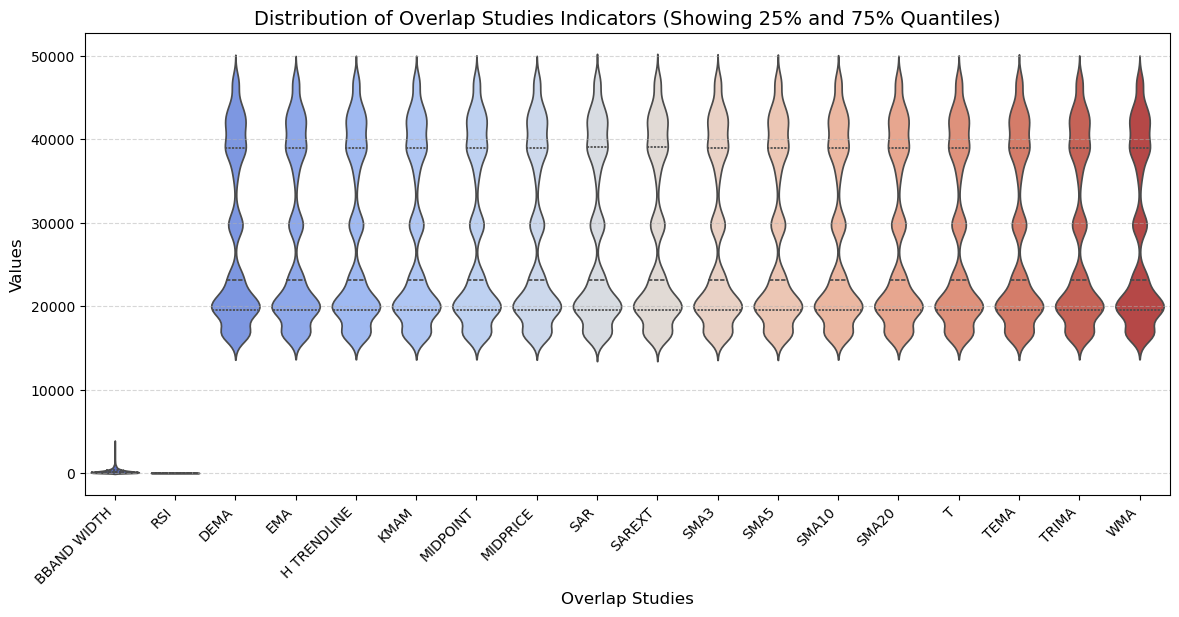

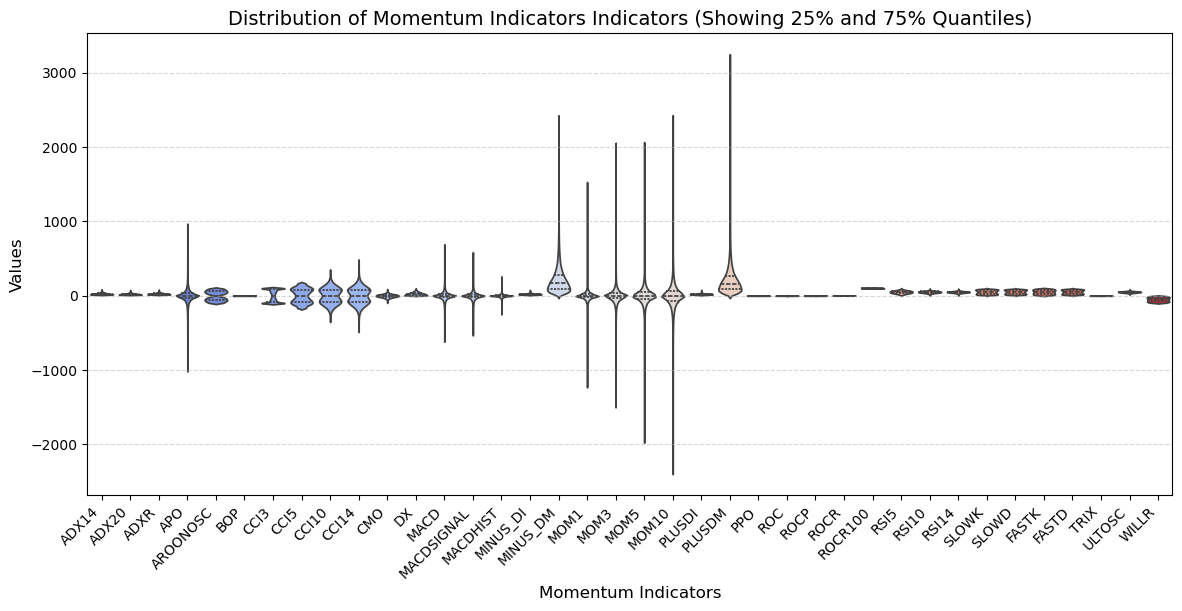

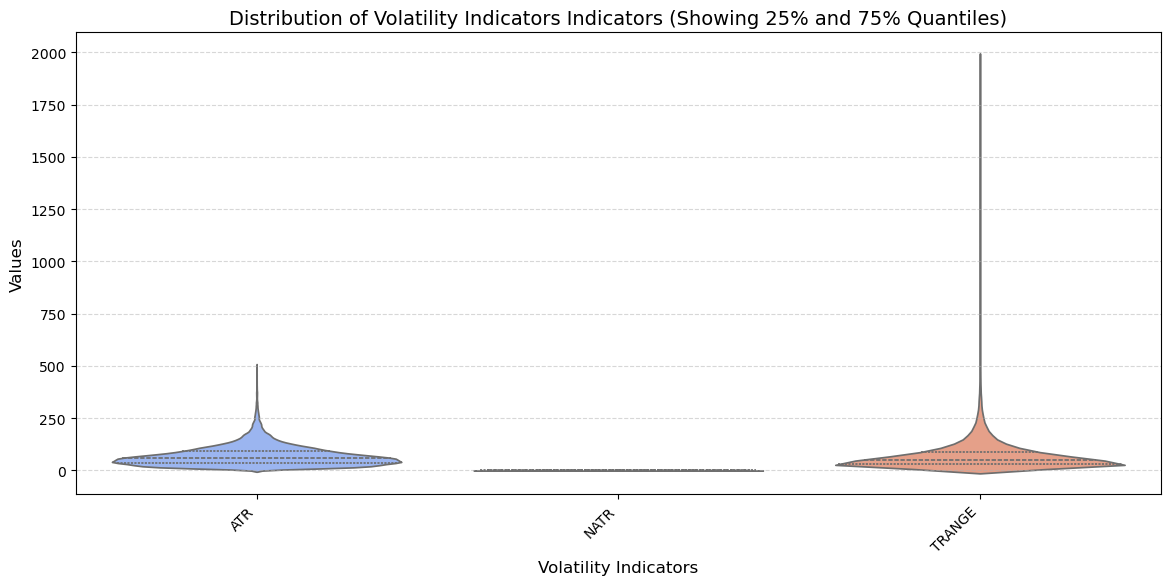

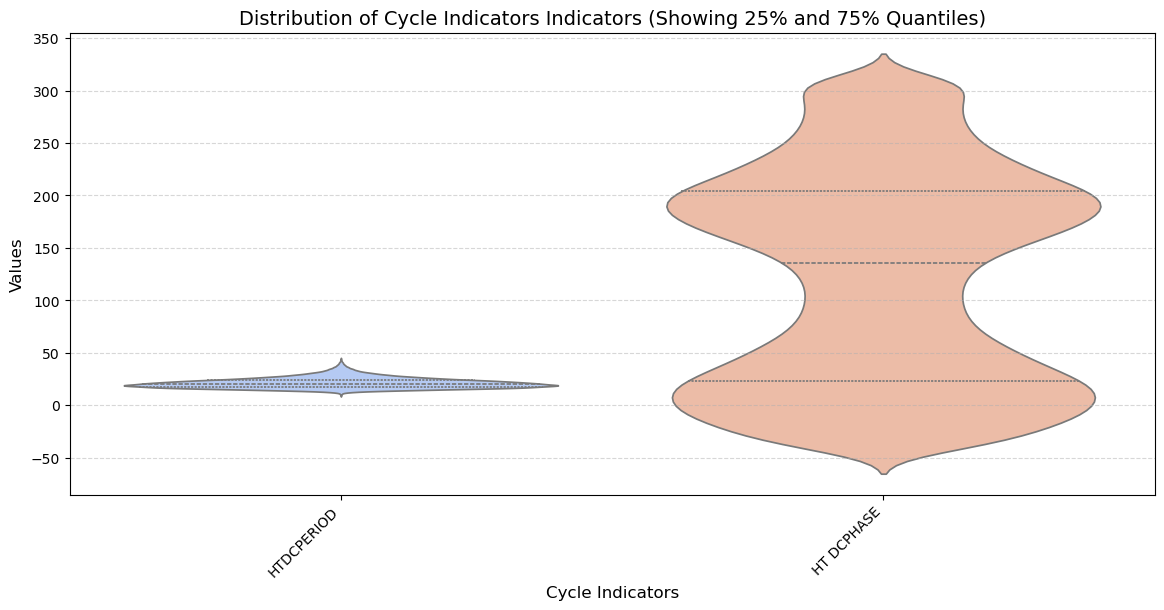

In [239]:
picture.plot_violin_by_category(df_cleaned)

These figures present the distribution of various financial indicators using violin plots. They showcase the spread, density, and quartiles of each indicator without any normalization applied. Here’s a breakdown of each figure:

1. **Overlap Studies Indicators:**
   - These indicators include moving averages (SMA, EMA, TEMA, etc.) and Bollinger Band Width.
   - Most indicators exhibit a multi-modal distribution, indicating varied behavior over time.
   - The BBAND WIDTH indicator has a significantly lower range compared to others, possibly due to its nature in measuring volatility.

2. **Momentum Indicators:**
   - Includes indicators like RSI, MACD, ADX, and CCI.
   - Some indicators, such as MOM (Momentum), show high variance with long tails.
   - Many distributions are centered around zero, reflecting oscillatory characteristics of momentum indicators.

3. **Volatility Indicators:**
   - Includes ATR (Average True Range), NATR, and TRANGE.
   - ATR and TRANGE have wider distributions, indicating their responsiveness to price swings.
   - NATR shows a narrower spread, suggesting it maintains a relatively stable range.

4. **Cycle Indicators:**
   - HT_DCPERIOD and HT_DCPHASE are shown.
   - HT_DCPHASE has a much wider spread, reflecting phase shifts in cyclical analysis.
   - The different distributions suggest varying responses to market trends.

### Why No Normalization?
Normalization is intentionally avoided here to preserve raw data characteristics, ensuring accurate interpretation of indicator behaviors relative to their absolute values. Applying normalization could distort relationships and make direct comparisons with real-world market data more challenging.

Would you like a more detailed analysis of a specific indicator set?

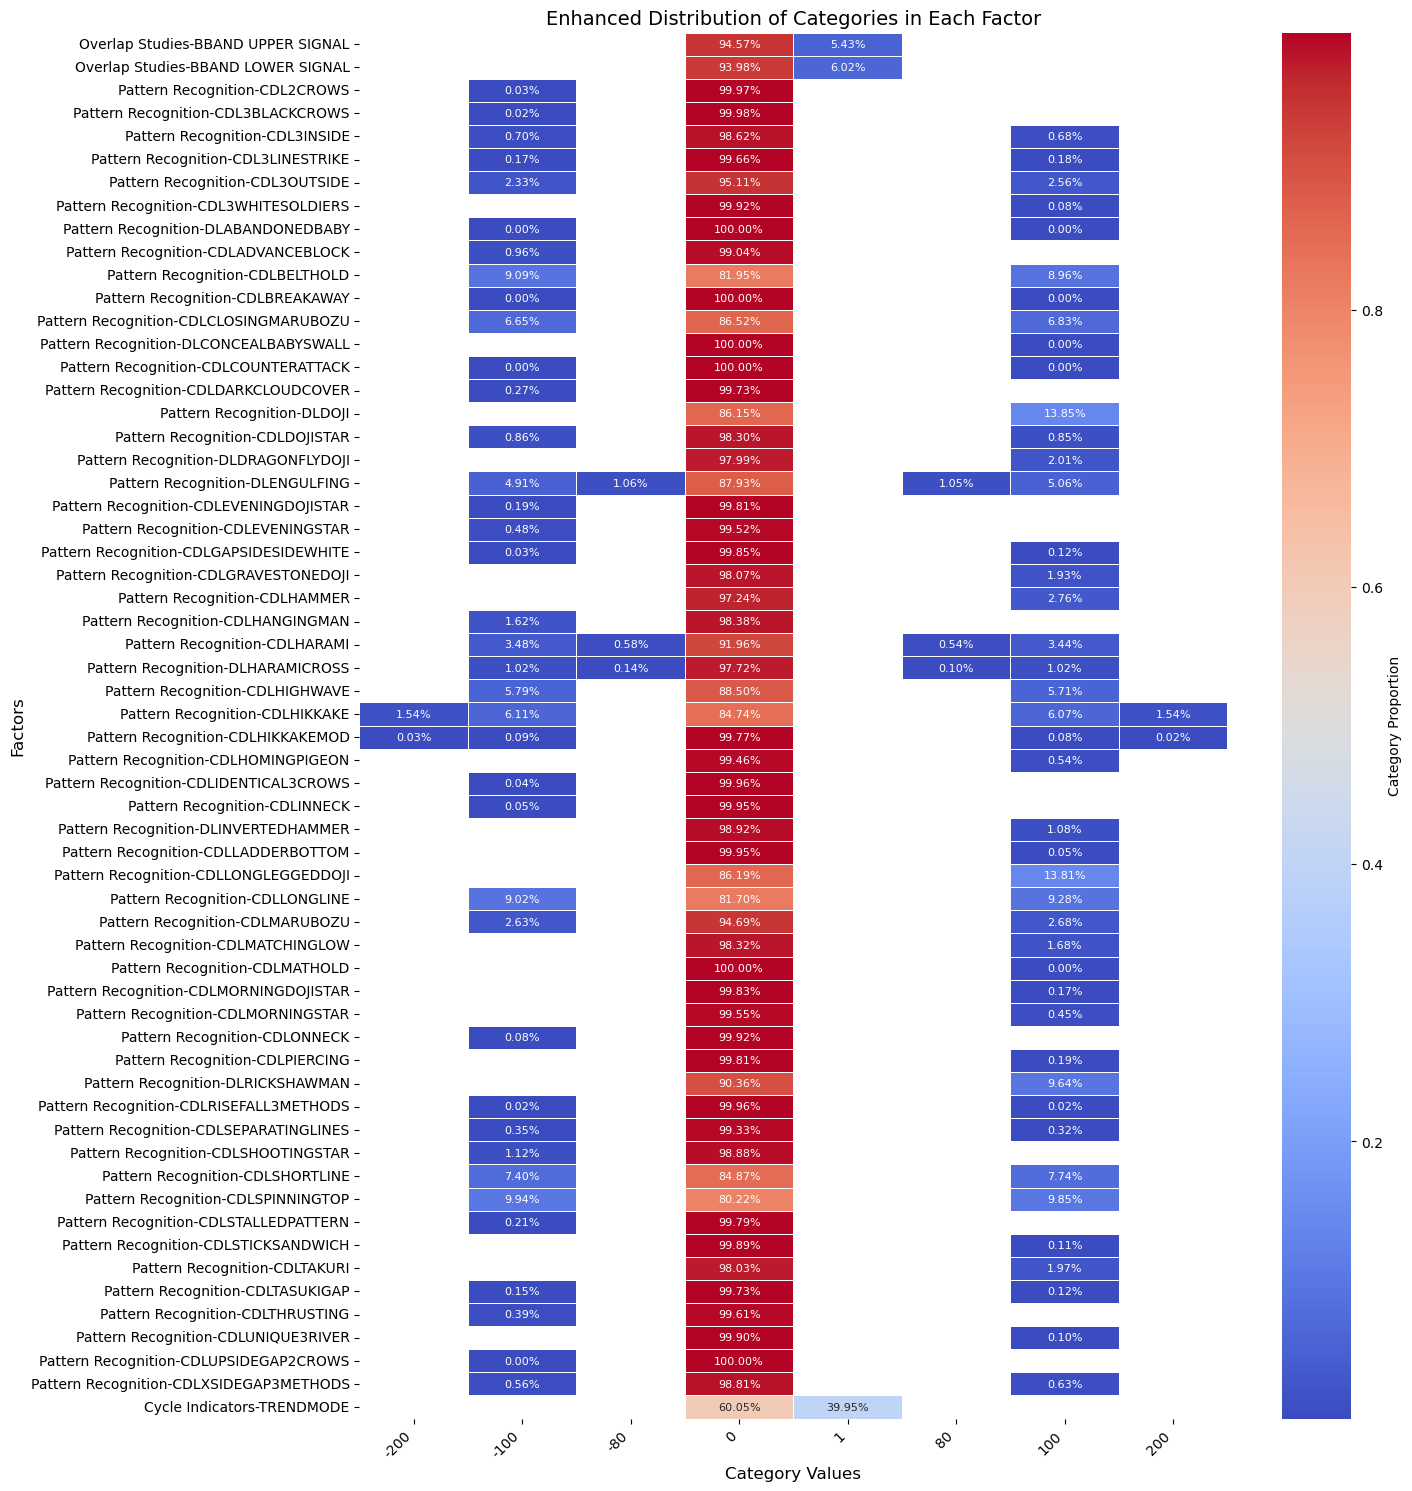

In [257]:
categorical_df = df_cleaned[categorical_columns]
picture.plot_category_distribution(categorical_df)


### Analysis

From this chart, we can see that the proportion of buy and sell signals for signal-type indicators is significantly lower than 25%, approximately around 1%. This will be taken into account when setting up buy and sell signals in the future.

## Correlation Analysis

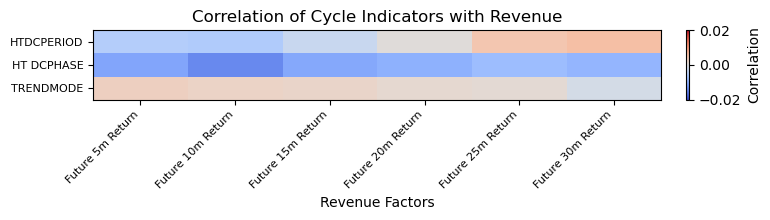

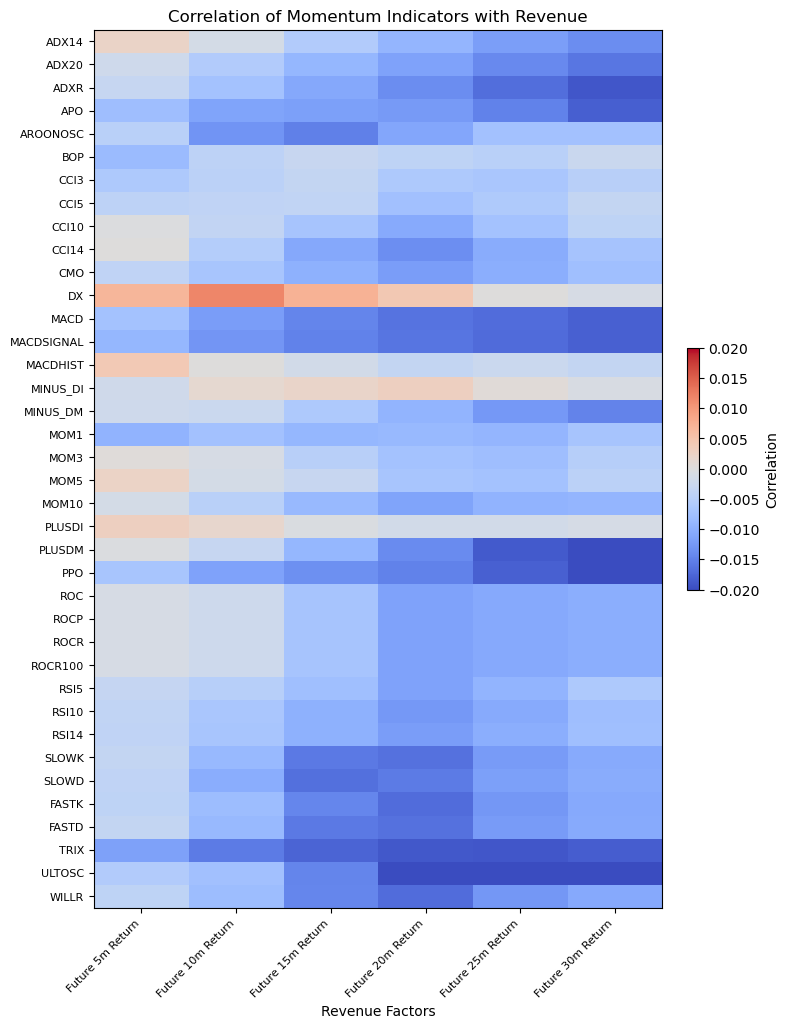

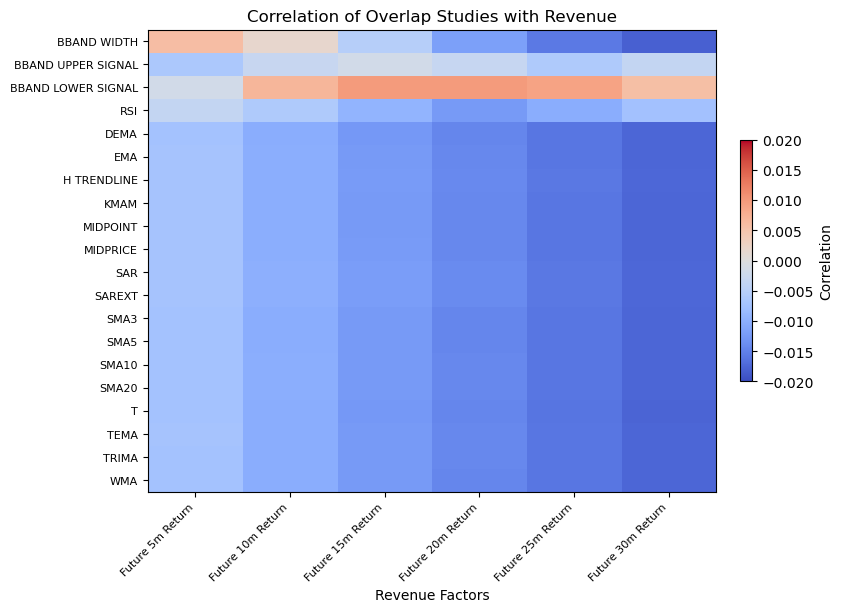

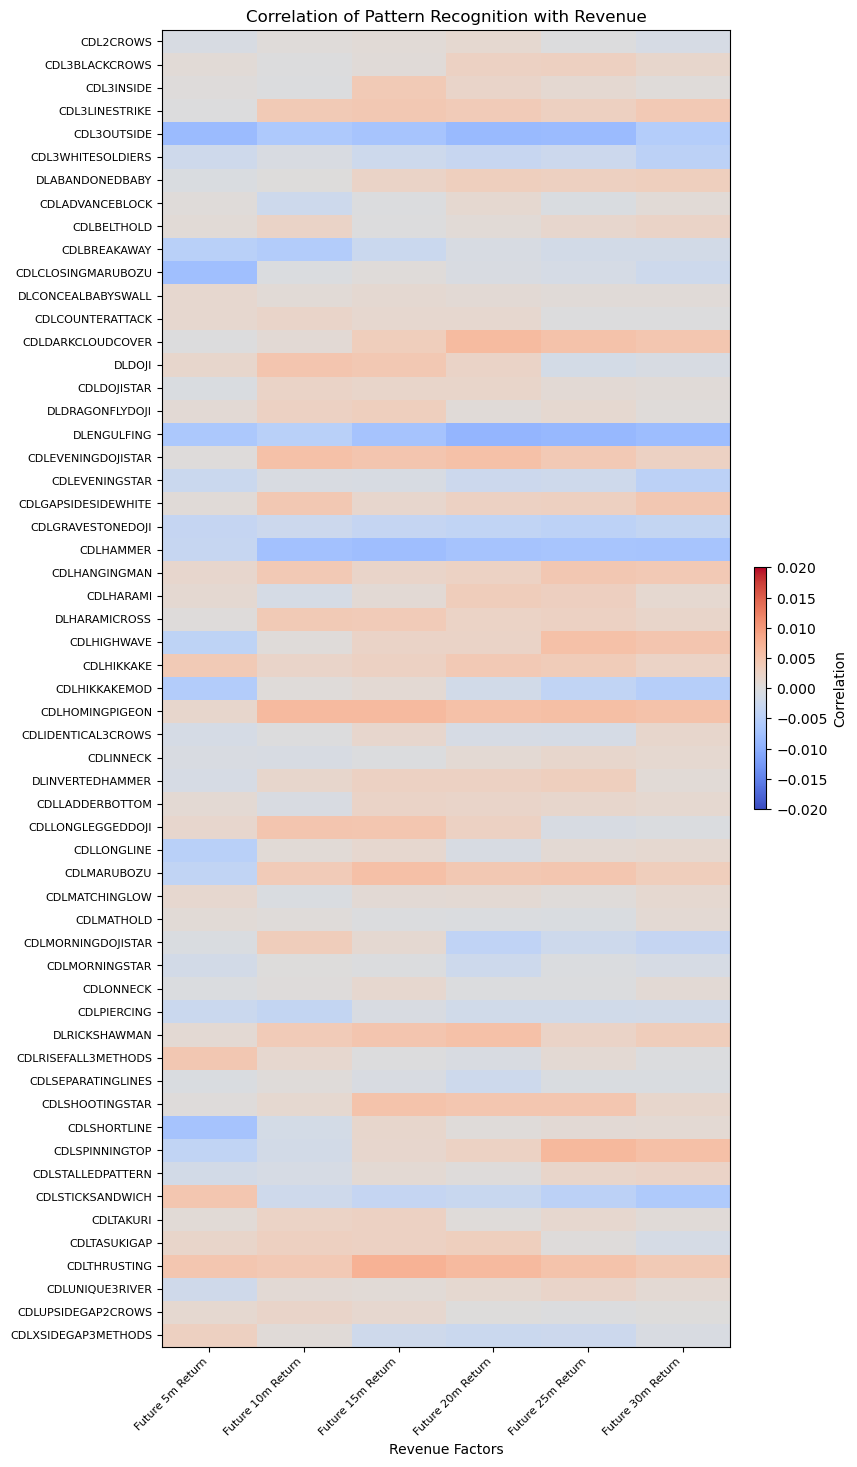

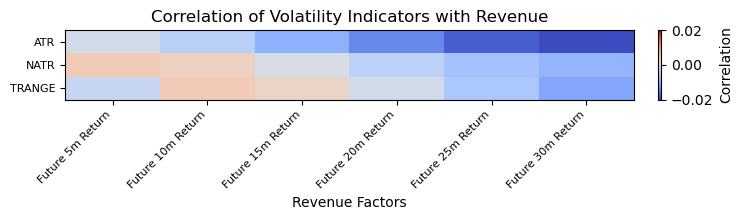

In [261]:
# Define the future return intervals
future_intervals = [5, 10, 15, 20, 25, 30]

# Compute future returns and store in a dictionary
future_returns = {
    f"Future {interval}m Return": BTC["close"].pct_change(periods=interval).shift(-interval) for interval in future_intervals
}

# Convert the dictionary to a DataFrame with MultiIndex columns
future_returns_df = pd.DataFrame(future_returns, index=BTC.index)
future_returns_df.columns = pd.MultiIndex.from_tuples([("Revenue", col) for col in future_returns_df.columns],
                                                      names=["Category", "Factor"])

# Concatenate the original DataFrame with the new future return columns
df_extended = pd.concat([df_cleaned, future_returns_df], axis=1)

# Compute correlation of all factors with each future return under the "Revenue" category
revenue_columns = [col for col in df_extended.columns if col[0] == "Revenue"]

# Compute correlation between factors and future returns
factor_correlations = df_extended.corr().loc[:, revenue_columns].drop(index=revenue_columns)

picture.plot_factor_correlation_heatmaps(factor_correlations)

From the correlation heatmaps, we can observe that most indicators within a given category tend to exhibit a similar correlation direction with future returns. Here’s why this might be happening:

1. **Overlap Studies (Moving Averages, Bollinger Bands, etc.):**  
   - Most moving averages (SMA, EMA, WMA, etc.) have similar correlation patterns because they are all smoothing indicators that capture trends. When price trends persist, these indicators generally align in their directional movement.
   - Bollinger Bands show a different correlation direction because they measure volatility rather than trend persistence. The BBAND WIDTH and BBAND SIGNAL indicators capture price dispersion, which may have a different impact on returns compared to trend-following indicators.

2. **Momentum Indicators (MACD, RSI, CCI, etc.):**  
   - Many momentum indicators show the same correlation direction because they are designed to capture the strength and speed of price movements. If momentum is a leading indicator of trend continuation, it will show a consistent correlation with future returns.
   - Some indicators, such as MACD and RSI, may show different correlation directions due to their distinct methodologies. RSI measures overbought/oversold conditions, while MACD focuses on moving average convergence/divergence, which can signal different phases of price movements.

3. **Volatility Indicators (ATR, NATR, TRANGE):**  
   - Volatility-based indicators generally exhibit similar correlation directions, as they track market uncertainty and fluctuations. Increased volatility often correlates with stronger price movements, influencing all indicators in the same way.
   - However, some indicators like TRANGE (True Range) may have different correlations because they focus on extreme price movements, which might not always translate directly into future returns.

4. **Cycle Indicators (HT_DCPERIOD, HT_DCPHASE, TRENDMODE):**  
   - These indicators focus on cyclical behavior in prices, leading to similar correlation patterns. If price cycles align with return timing, these indicators will show consistent directional correlations.
   - Differences among them arise because some cycle indicators measure phase shifts (HT_DCPHASE), while others track dominant cycle periods (HT_DCPERIOD), leading to variations in correlation.

5. **Pattern Recognition Indicators:**  
   - Most of these indicators capture common candlestick patterns, so they tend to correlate in the same direction when certain patterns indicate trend continuation or reversal.
   - However, variations occur because different patterns have different implications—some signal bullish reversals, while others indicate bearish trends, leading to mixed correlation directions.

## Indicator Test

Based on the analysis in **Strategy 1**, we concluded that directly using raw factor values for model learning leads to excessively frequent position openings, which are not sufficient to cover transaction costs. Therefore, in this approach, all numerical indicators are converted into trading signals.  

### **Trading Signal Generation Strategy:**  
- **Quantile-based Thresholds:**  
  - A factor is considered **high** if it is above the **75th percentile (upper quantile)** → **Buy signal (1)**  
  - A factor is considered **low** if it is below the **25th percentile (lower quantile)** → **Sell signal (-1)**  
  - Values between these thresholds result in a **neutral signal (0)**  

- **Correlation Adjustment:**  
  - If a factor has a **negative correlation** with returns, the signal direction is inverted to maintain the correct predictive relationship.

This transformation ensures a more structured and interpretable signal-based approach, reducing unnecessary trades and improving robustness against transaction costs.

In [288]:
# Create dictionaries to store trading signals
trading_signals_numerical = {}
trading_signals_categorical = {}

# Define quantile thresholds for numerical data
upper_quantile = 0.75  # High value threshold
lower_quantile = 0.25  # Low value threshold

# Define target revenue factor for signal generation
target_revenue_factor = ("Revenue", "Future 5m Return")

# Extract relevant correlations
if target_revenue_factor in factor_correlations.columns:
    target_correlations = factor_correlations[target_revenue_factor]
else:
    raise ValueError("Future 5m Return column not found in factor_correlations.")

# Process numerical columns
for (category, factor_name), corr_value in target_correlations.items():
    if (category, factor_name) in df_extended[numerical_columns].columns:
        factor_values = df_extended[(category, factor_name)]

        # Compute quantiles
        upper_threshold = factor_values.quantile(upper_quantile)
        lower_threshold = factor_values.quantile(lower_quantile)

        # Assign signals: 1 for buy, -1 for sell, 0 for neutral
        signal = np.where(
            factor_values > upper_threshold, 1,  # Buy signal
            np.where(factor_values < lower_threshold, -1, 0)  # Sell and Neutral signals
        )

        # Adjust signal direction based on correlation sign
        if corr_value < 0:
            signal = -signal  # Invert signal if correlation is negative

        trading_signals_numerical[(category, factor_name)] = signal

# Process categorical columns
for (category, factor_name), corr_value in target_correlations.items():
    if (category, factor_name) in df_extended[categorical_columns].columns:
        factor_values = df_extended[(category, factor_name)]

        # Get unique values and count
        unique_vals_sorted = sorted(factor_values.dropna().unique())
        unique_count = len(unique_vals_sorted)

        # Assign signals based on unique count
        if unique_count == 2:
            signal_map = {unique_vals_sorted[0]: 0, unique_vals_sorted[1]: 1}
        elif unique_count == 3:
            signal_map = {unique_vals_sorted[0]: 0, unique_vals_sorted[1]: 1, unique_vals_sorted[2]: -1}
        elif unique_count == 5:
            signal_map = {unique_vals_sorted[0]: 0, unique_vals_sorted[1]: 1, unique_vals_sorted[2]: -1,
                          unique_vals_sorted[3]: 1, unique_vals_sorted[4]: -1}
        else:
            signal_map = {val: 0 for val in unique_vals_sorted}  # Default neutral mapping for unsupported cases

        signal = factor_values.map(signal_map).fillna(0)
        
        if corr_value < 0:
            signal = -signal  # Invert signal if correlation is negative

        trading_signals_categorical[(category, factor_name)] = signal

# Convert dictionaries to DataFrames with MultiIndex columns
trading_signals_numerical_df = pd.DataFrame(trading_signals_numerical, index=df_extended.index)
trading_signals_numerical_df.columns = pd.MultiIndex.from_tuples(trading_signals_numerical_df.columns, names=["Category", "Factor"])

trading_signals_categorical_df = pd.DataFrame(trading_signals_categorical, index=df_extended.index)
trading_signals_categorical_df.columns = pd.MultiIndex.from_tuples(trading_signals_categorical_df.columns, names=["Category", "Factor"])


In [290]:
# Create dictionaries to store evaluation metrics for numerical and categorical factors
strategy_evaluation_results_numerical = {}
strategy_evaluation_results_categorical = {}

# Evaluate numerical factor strategies
for (category, factor_name) in trading_signals_numerical_df.columns:
    # Get the trading signal series for the factor
    series_position_long_short = long_short_strategy(trading_signals_numerical_df[category][factor_name])

    # Calculate the cumulative asset value
    df_result = calculate_cumulative_asset(BTC["close"], series_position_long_short)

    # Evaluate the strategy and store results
    evaluation_metrics = evaluate_strategy(df_result, risk_free_rate=0.0)
    strategy_evaluation_results_numerical[(category, factor_name)] = evaluation_metrics

# Evaluate categorical factor strategies
for (category, factor_name) in trading_signals_categorical_df.columns:
    # Get the trading signal series for the factor
    series_position_long_short = long_short_strategy(trading_signals_categorical_df[category][factor_name])

    # Calculate the cumulative asset value
    df_result = calculate_cumulative_asset(BTC["close"], series_position_long_short)

    # Evaluate the strategy and store results
    evaluation_metrics = evaluate_strategy(df_result, risk_free_rate=0.0)
    strategy_evaluation_results_categorical[(category, factor_name)] = evaluation_metrics

# Convert the results dictionaries into structured DataFrames
evaluation_results_numerical_df = pd.DataFrame(strategy_evaluation_results_numerical).T
evaluation_results_numerical_df.columns = ["Sharpe Ratio", "Max Drawdown (%)", "Holding Win Rate (%)", 
                                           "Trading Win Rate (%)", "Final Cumulative Return (%)", "Turnover (%)"]

evaluation_results_categorical_df = pd.DataFrame(strategy_evaluation_results_categorical).T
evaluation_results_categorical_df.columns = ["Sharpe Ratio", "Max Drawdown (%)", "Holding Win Rate (%)", 
                                             "Trading Win Rate (%)", "Final Cumulative Return (%)", "Turnover (%)"]


In [342]:
# Select the top 10 factors based on Sharpe Ratio
top_20_factors_numerical = evaluation_results_numerical_df.sort_values(by="Sharpe Ratio", ascending=False).head(20)
top_20_factors_numerical

Sharpe Ratio  Max Drawdown (%)  \
Overlap Studies       H TRENDLINE      2.495689        -24.055384   
                      T                2.470512        -23.683610   
                      MIDPOINT         2.332384        -23.455288   
                      TRIMA            2.294144        -23.455288   
                      SMA20            2.278976        -23.390786   
                      TEMA             2.255501        -22.803466   
                      MIDPRICE         2.251318        -23.390786   
                      EMA              2.243361        -23.455288   
                      SMA3             2.229107        -23.447543   
                      SMA5             2.190656        -23.447543   
                      WMA              2.181935        -23.481495   
                      SMA10            2.181728        -23.525470   
                      KMAM             2.175004        -23.443410   
                      DEMA             2.169536        -22.794168   
                      SAREXT           1.919176        -23.130396   
                      SAR              1.908872        -23.033969   
Cycle Indicators      HT DCPHASE       0.791504        -24.559987   
Volatility Indicators ATR              0.750703        -28.449130   
Momentum Indicators   TRIX             0.568906        -31.213689   
                      MACD             0.034507        -44.857709   

                                   Holding Win Rate (%)  Trading Win Rate (%)  \
Overlap Studies       H TRENDLINE             25.071785             98.333333   
                      T                       25.065107             90.625000   
                      MIDPOINT                25.109943             98.734177   
                      TRIMA                   25.084186             95.774648   
                      SMA20                   25.090864             97.014925   
                      TEMA                    25.139516             98.373984   
                      MIDPRICE                25.105173             92.771084   
                      EMA                     25.093726            100.000000   
                      SMA3                    25.197707             97.076023   
                      SMA5                    25.154779             93.893130   
                      WMA                     25.093726            100.000000   
                      SMA10                   25.116621             98.901099   
                      KMAM                    25.108035            100.000000   
                      DEMA                    25.122344             97.849462   
                      SAREXT                  25.132838             63.285024   
                      SAR                     25.133792             63.285024   
Cycle Indicators      HT DCPHASE              28.319994             41.152093   
Volatility Indicators ATR                     25.790111             45.677123   
Momentum Indicators   TRIX                    25.752907             66.912540   
                      MACD                    27.298311             73.371105   

                                   Final Cumulative Return (%)  Turnover (%)  
Overlap Studies       H TRENDLINE                   165.492128    523.820000  
                      T                             162.162571    523.560000  
                      MIDPOINT                      147.063026    524.040000  
                      TRIMA                         144.084052    524.040000  
                      SMA20                         141.920428    524.040000  
                      TEMA                          138.804410    523.860000  
                      MIDPRICE                      138.557510    524.010000  
                      EMA                           138.890931    524.040000  
                      SMA3                          136.171666    524.120000  
                      SMA5                          132.699156    524.120000  
              

In [343]:
# Select the top 10 factors based on Sharpe Ratio
top_20_factors_categorical = evaluation_results_categorical_df.sort_values(by="Sharpe Ratio", ascending=False).head(20)
top_20_factors_categorical

Sharpe Ratio  Max Drawdown (%)  \
Overlap Studies     BBAND UPPER SIGNAL      3.354839         -6.739396   
Pattern Recognition CDLCLOSINGMARUBOZU      1.935578        -37.208375   
                    CDLBREAKAWAY            1.914921        -24.714792   
                    DLABANDONEDBABY         1.798368        -24.714792   
                    CDLLONGLINE             1.533658        -38.448186   
                    CDL2CROWS               1.493387        -31.990233   
                    CDL3LINESTRIKE          1.488946        -31.505439   
                    CDL3OUTSIDE             1.486242        -36.645452   
                    CDLINNECK               1.472634        -35.831057   
                    CDLEVENINGSTAR          1.390386        -36.433990   
                    CDLSTALLEDPATTERN       1.383455        -36.478136   
                    CDLONNECK               1.370551        -36.787952   
                    CDLDOJISTAR             1.341785        -38.704242   
                    CDLIDENTICAL3CROWS      1.339107        -38.385729   
                    CDLDARKCLOUDCOVER       1.301665        -38.780478   
                    DLHARAMICROSS           1.195143        -36.182583   
                    CDLSEPARATINGLINES      1.158303        -37.501385   
                    CDLHIKKAKE              1.057616        -38.216888   
                    CDLHIGHWAVE             1.021758        -38.841757   
                    CDLHARAMI               0.983032        -36.958865   

                                        Holding Win Rate (%)  \
Overlap Studies     BBAND UPPER SIGNAL              5.825789   
Pattern Recognition CDLCLOSINGMARUBOZU             52.620985   
                    CDLBREAKAWAY                   49.975674   
                    DLABANDONEDBABY                49.973766   
                    CDLLONGLINE                    52.970132   
                    CDL2CROWS                      49.987122   
                    CDL3LINESTRIKE                 50.065346   
                    CDL3OUTSIDE                    50.912456   
                    CDLINNECK                      50.002385   
                    CDLEVENINGSTAR                 50.238011   
                    CDLSTALLEDPATTERN              50.068208   
                    CDLONNECK                      49.978536   
                    CDLDOJISTAR                    50.384920   
                    CDLIDENTICAL3CROWS             49.995707   
                    CDLDARKCLOUDCOVER              50.098734   
                    DLHARAMICROSS                  49.919391   
                    CDLSEPARATINGLINES             50.139754   
                    CDLHIKKAKE                     50.716895   
                    CDLHIGHWAVE                    49.995707   
                    CDLHARAMI                      50.938212   

                                        Trading Win Rate (%)  \
Overlap Studies     BBAND UPPER SIGNAL             62.475182   
Pattern Recognition CDLCLOSINGMARUBOZU             53.502894   
                    CDLBREAKAWAY                  100.000000   
                    DLABANDONEDBABY               100.000000   
                    CDLLONGLINE                    52.561475   
                    CDL2CROWS                      64.516129   
                    CDL3LINESTRIKE                 51.724138   
                    CDL3OUTSIDE                    54.229669   
                    CDLINNECK                      50.943396   
                    CDLEVENINGSTAR                 51.084813   
                    CDLSTALLEDPATTERN              51.555556   
                    CDLONNECK                      54.022989   
                    CDLDOJISTAR                    46.376812   
                    CDLIDENTICAL3CROWS             52.777778   
                    CDLDARKCLOUDCOVER              49.116608   
                    DLHARAMICROSS                  47.235239   
                    CDLSEPARATINGLINES             5

In [354]:
top_20_factors_index_categorical = top_20_factors_categorical.index
top_20_factors_index_numerical = top_20_factors_numerical.index

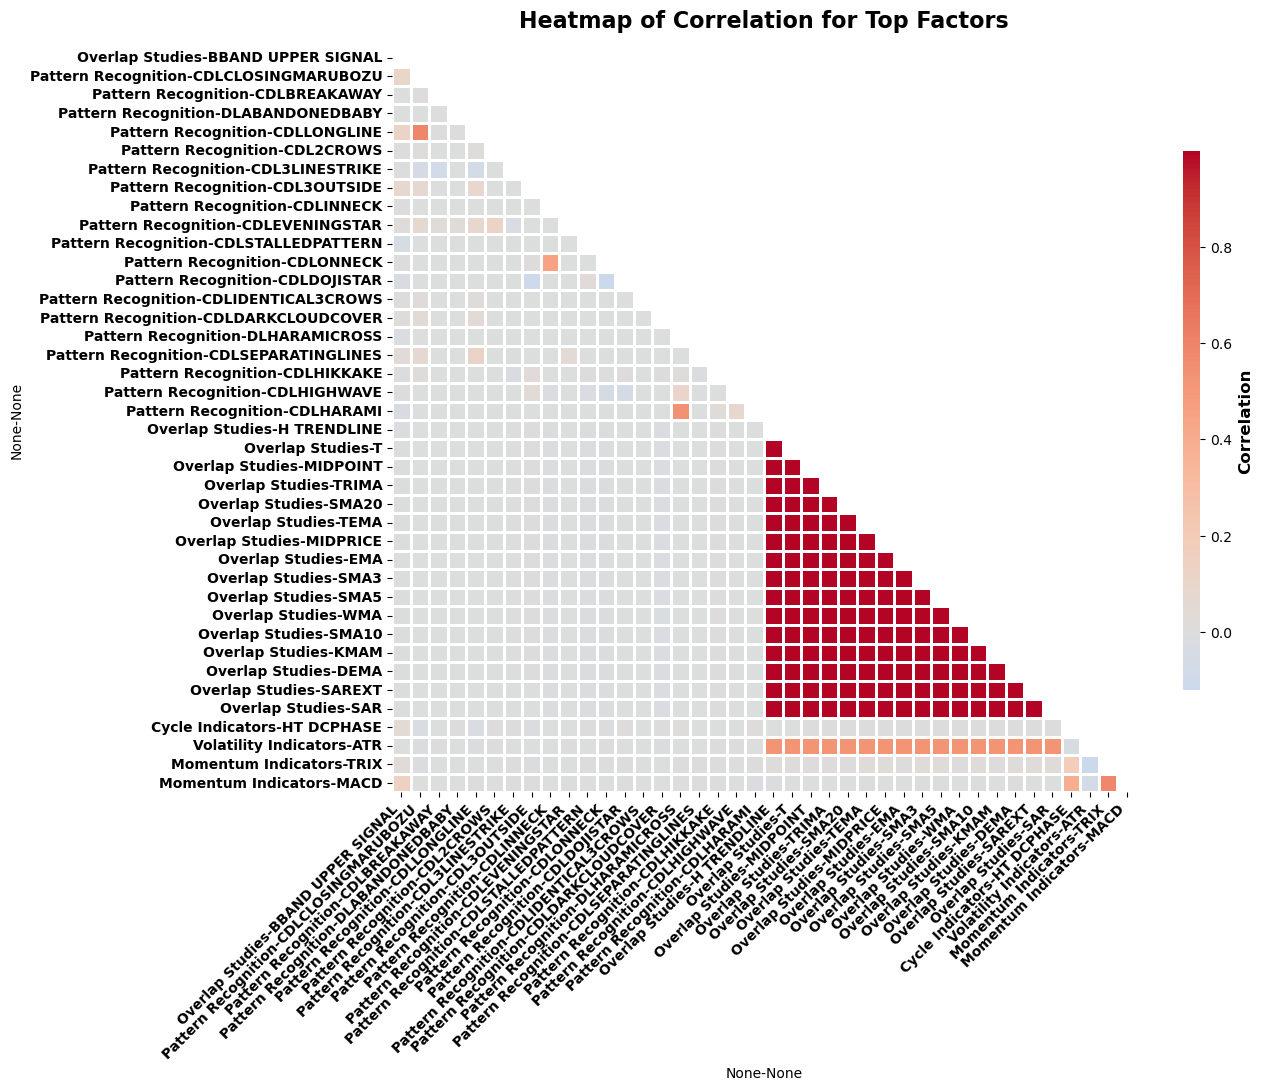

In [346]:
top_factors_corr = picture.plot_top_factors_correlation(df_extended, top_20_factors_index_categorical, top_20_factors_index_numerical)

From this heatmap, we can see that some **indicators have very high correlations** (close to 1), especially among **Overlap Studies** and certain **Pattern Recognition** factors. This suggests a **multicollinearity issue** where redundant factors provide overlapping information.  

### **Key Issues:**
- High correlation means these indicators likely convey **similar signals**, leading to **redundant features** that do not improve predictive power.
- For example, multiple **SMA, EMA, and WMA indicators** are highly correlated, potentially making some of them unnecessary.
- Certain **Pattern Recognition indicators** (e.g., **CDLLONGLINE, CDLENGULFING**) are strongly correlated, which could result in excessive trading signals.

### **Possible Solutions:**
1. **Set a correlation threshold** (e.g., `|corr| > 0.7`) to identify redundant factors.  
2. **Remove highly correlated factors**, keeping only the most informative ones (e.g., selecting the most volatile or representative indicator).  
3. **Apply PCA or hierarchical clustering** to reduce dimensionality while retaining meaningful information.  

Filtering out highly correlated indicators can **increase signal diversity**, **reduce overfitting**, and improve strategy robustness. 

In [347]:
top_factors_df = pd.concat([top_20_factors_categorical, top_20_factors_numerical], axis=0)
top_factors_df = top_factors_df.sort_values(by="Sharpe Ratio", ascending=False)

In [348]:
top_factors_index = top_factors_df.index
# Set to store factors that should be removed
factors_to_remove = set()

# Iterate over the correlation matrix to find highly correlated factors
for i in range(len(top_factors_index)):
    for j in range(i + 1, len(top_factors_index)):
        factor1 = top_factors_index[i]
        factor2 = top_factors_index[j]

        # If correlation is greater than 0.7, remove the lower-ranked factor
        if top_factors_corr.loc[factor1, factor2] > 0.7:
            factors_to_remove.add(factor2)

# Filter the top factors index to exclude highly correlated ones
filtered_top_factors_index = [factor for factor in top_factors_index if factor not in factors_to_remove]

In [359]:
# Find common columns between filtered_top_factors_index and top_30_factors_numerical
common_columns = list(set(filtered_top_factors_index) & set(top_20_factors_index_numerical))

# Select only the common columns
top_factors_numerical_filtered = top_20_factors_numerical.loc[common_columns]

top_factors_numerical_filtered

Sharpe Ratio  Max Drawdown (%)  \
Overlap Studies       H TRENDLINE      2.495689        -24.055384   
Momentum Indicators   MACD             0.034507        -44.857709   
                      TRIX             0.568906        -31.213689   
Volatility Indicators ATR              0.750703        -28.449130   
Cycle Indicators      HT DCPHASE       0.791504        -24.559987   

                                   Holding Win Rate (%)  Trading Win Rate (%)  \
Overlap Studies       H TRENDLINE             25.071785             98.333333   
Momentum Indicators   MACD                    27.298311             73.371105   
                      TRIX                    25.752907             66.912540   
Volatility Indicators ATR                     25.790111             45.677123   
Cycle Indicators      HT DCPHASE              28.319994             41.152093   

                                   Final Cumulative Return (%)  Turnover (%)  
Overlap Studies       H TRENDLINE                   165.492128        523.82  
Momentum Indicators   MACD                          -13.831933        523.98  
                      TRIX                           17.518400        523.70  
Volatility Indicators ATR                            28.420640        524.06  
Cycle Indicators      HT DCPHASE                     29.881191        523.82

In [360]:
# Find common columns between filtered_top_factors_index and top_30_factors_numerical
common_columns = list(set(filtered_top_factors_index) & set(top_20_factors_index_categorical))

# Select only the common columns
top_factors_categorical_filtered = top_20_factors_categorical.loc[common_columns]

top_factors_categorical_filtered

Sharpe Ratio  Max Drawdown (%)  \
Pattern Recognition CDLDARKCLOUDCOVER       1.301665        -38.780478   
Overlap Studies     BBAND UPPER SIGNAL      3.354839         -6.739396   
Pattern Recognition CDLINNECK               1.472634        -35.831057   
                    DLABANDONEDBABY         1.798368        -24.714792   
                    CDLHIGHWAVE             1.021758        -38.841757   
                    CDLIDENTICAL3CROWS      1.339107        -38.385729   
                    CDLDOJISTAR             1.341785        -38.704242   
                    CDLSEPARATINGLINES      1.158303        -37.501385   
                    CDLEVENINGSTAR          1.390386        -36.433990   
                    CDLSTALLEDPATTERN       1.383455        -36.478136   
                    CDL3OUTSIDE             1.486242        -36.645452   
                    CDLHARAMI               0.983032        -36.958865   
                    CDLCLOSINGMARUBOZU      1.935578        -37.208375   
                    CDLHIKKAKE              1.057616        -38.216888   
                    CDLLONGLINE             1.533658        -38.448186   
                    CDL3LINESTRIKE          1.488946        -31.505439   
                    DLHARAMICROSS           1.195143        -36.182583   
                    CDL2CROWS               1.493387        -31.990233   
                    CDLBREAKAWAY            1.914921        -24.714792   
                    CDLONNECK               1.370551        -36.787952   

                                        Holding Win Rate (%)  \
Pattern Recognition CDLDARKCLOUDCOVER              50.098734   
Overlap Studies     BBAND UPPER SIGNAL              5.825789   
Pattern Recognition CDLINNECK                      50.002385   
                    DLABANDONEDBABY                49.973766   
                    CDLHIGHWAVE                    49.995707   
                    CDLIDENTICAL3CROWS             49.995707   
                    CDLDOJISTAR                    50.384920   
                    CDLSEPARATINGLINES             50.139754   
                    CDLEVENINGSTAR                 50.238011   
                    CDLSTALLEDPATTERN              50.068208   
                    CDL3OUTSIDE                    50.912456   
                    CDLHARAMI                      50.938212   
                    CDLCLOSINGMARUBOZU             52.620985   
                    CDLHIKKAKE                     50.716895   
                    CDLLONGLINE                    52.970132   
                    CDL3LINESTRIKE                 50.065346   
                    DLHARAMICROSS                  49.919391   
                    CDL2CROWS                      49.987122   
                    CDLBREAKAWAY                   49.975674   
                    CDLONNECK                      49.978536   

                                        Trading Win Rate (%)  \
Pattern Recognition CDLDARKCLOUDCOVER              49.116608   
Overlap Studies     BBAND UPPER SIGNAL             62.475182   
Pattern Recognition CDLINNECK                      50.943396   
                    DLABANDONEDBABY               100.000000   
                    CDLHIGHWAVE                    45.933182   
                    CDLIDENTICAL3CROWS             52.777778   
                    CDLDOJISTAR                    46.376812   
                    CDLSEPARATINGLINES             53.314917   
                    CDLEVENINGSTAR                 51.084813   
                    CDLSTALLEDPATTERN              51.555556   
                    CDL3OUTSIDE                    54.229669   
                    CDLHARAMI                      44.886208   
                    CDLCLOSINGMARUBOZU             53.502894   
                    CDLHIKKAKE                     52.354399   
                    CDLLONGLINE                    52.561475   
                    CDL3LINESTRIKE                 51.724138   
                    DLHARAMICROSS                  4

### **Summary of Comparison**  
- **Categorical signals outperform numerical signals** in terms of **Sharpe Ratio, Win Rate, and Drawdown.**  
- **Numerical signals suffer from high drawdowns (-40% or worse)** and **low Sharpe Ratios (~0.5),** while categorical signals **maintain better stability and profitability.**  
- **Key Issue:** Fixed **0.75/0.25 quantiles for numerical signals** may not capture meaningful trading signals, leading to **frequent but ineffective trades.**  
- **Possible Fix:** Use **adaptive quantiles, trend filters, or Z-score normalization** to improve numerical signals.

In [385]:
def evaluate_quantile_performance(df_extended, factor_correlations, numerical_columns, BTC, upper_quantile, lower_quantile):
    """
    Evaluates trading signals and strategy performance for a given quantile setting.
    
    Parameters:
    - df_extended: DataFrame containing factor data.
    - factor_correlations: DataFrame of factor correlations with the target revenue factor.
    - numerical_columns: List of numerical factor columns.
    - BTC: DataFrame containing BTC close prices.
    - upper_quantile: Upper quantile threshold for buy signals.
    - lower_quantile: Lower quantile threshold for sell signals.
    
    Returns:
    - results_df: DataFrame with strategy evaluation results.
    - avg_sharpe: The average Sharpe ratio of the top 3 performing factors.
    """

    # Define target revenue factor
    target_revenue_factor = ("Revenue", "Future 5m Return")

    if target_revenue_factor not in factor_correlations.columns:
        raise ValueError("Future 5m Return column not found in factor_correlations.")

    target_correlations = factor_correlations[target_revenue_factor]

    trading_signals_numerical = {}
    strategy_evaluation_results_numerical = {}

    # Generate trading signals
    for (category, factor_name), corr_value in target_correlations.items():
        if (category, factor_name) in df_extended[numerical_columns].columns:
            factor_values = df_extended[(category, factor_name)]

            # Compute quantile thresholds
            upper_threshold = factor_values.quantile(upper_quantile)
            lower_threshold = factor_values.quantile(lower_quantile)

            # Assign trading signals
            signal = np.where(
                factor_values > upper_threshold, 1,
                np.where(factor_values < lower_threshold, -1, 0)
            )

            # Adjust signal based on correlation sign
            if corr_value < 0:
                signal = -signal

            trading_signals_numerical[(category, factor_name)] = signal

    # Convert signals to DataFrame
    trading_signals_numerical_df = pd.DataFrame(trading_signals_numerical, index=df_extended.index)
    trading_signals_numerical_df.columns = pd.MultiIndex.from_tuples(trading_signals_numerical_df.columns, names=["Category", "Factor"])

    # Evaluate strategy for each factor
    for (category, factor_name) in trading_signals_numerical_df.columns:
        series_position_long_short = long_short_strategy(trading_signals_numerical_df[category][factor_name])
        df_result = calculate_cumulative_asset(BTC["close"], series_position_long_short)
        evaluation_metrics = evaluate_strategy(df_result, risk_free_rate=0.0)
        strategy_evaluation_results_numerical[(category, factor_name)] = evaluation_metrics

    # Convert results dictionary to DataFrame
    results_df = pd.DataFrame(strategy_evaluation_results_numerical).T
    results_df.columns = ["Sharpe Ratio", "Max Drawdown (%)", "Holding Win Rate (%)",
                          "Trading Win Rate (%)", "Final Cumulative Return (%)", "Turnover (%)"]
    
    lines_to_remove = [
        ("Overlap Studies", "MIDPOINT"),
        ("Overlap Studies", "TRIMA"),
        ("Overlap Studies", "SMA20"),
        ("Overlap Studies", "TEMA"),
        ("Overlap Studies", "MIDPRICE"),
        ("Overlap Studies", "EMA"),
        ("Overlap Studies", "SMA3"),
        ("Overlap Studies", "SMA5"),
        ("Overlap Studies", "WMA"),
        ("Overlap Studies", "SMA10"),
        ("Overlap Studies", "KMAM"),
        ("Overlap Studies", "DEMA"),
        ("Overlap Studies", "SAREXT"),
        ("Overlap Studies", "SAR")
    ]

    # Remove the specified rows from the DataFrame
    filtered_results_df = results_df[~results_df.index.isin(lines_to_remove)]

    # Compute the average Sharpe ratio of the top 3 factors
    avg_sharpe = filtered_results_df["Sharpe Ratio"].nlargest(3).mean()

    return filtered_results_df, avg_sharpe

In [386]:
# Define quantile search space
quantile_range = [0.75, 0.85, 0.9, 0.93, 0.95, 0.97, 0.99, 0.995]

# Dictionary to store results for each quantile setting
quantile_results = {}
quantile_plot_results = {}

best_avg_sharpe = -np.inf
best_quantiles = None
best_results_df = None

# Iterate over quantile pairs externally
for upper_quantile in quantile_range:
    lower_quantile = 1 - upper_quantile  # Ensure symmetry
    if lower_quantile >= upper_quantile:
        continue  # Ensure lower quantile is less than upper quantile

    # Evaluate the strategy for the current quantile pair
    results_df, avg_sharpe = evaluate_quantile_performance(
        df_extended, factor_correlations, numerical_columns, BTC, upper_quantile, lower_quantile
    )

    # Store results
    quantile_results[(upper_quantile, lower_quantile)] = results_df
    quantile_plot_results[upper_quantile] = avg_sharpe

    # Update best quantiles if this setting improves the Sharpe ratio
    if avg_sharpe > best_avg_sharpe:
        best_avg_sharpe = avg_sharpe
        best_quantiles = (upper_quantile, lower_quantile)
        best_results_df = results_df

# Convert dictionary into a structured DataFrame
quantile_results_df = pd.concat(quantile_results, names=["Upper Quantile", "Lower Quantile"])
quantile_results_df.reset_index(inplace=True)

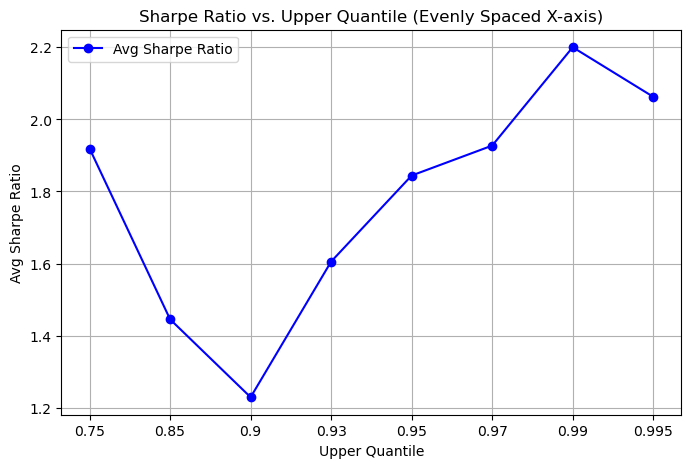

In [390]:
picture.plot_quantile_vs_sharpe(quantile_plot_results)

The plot shows the relationship between **Upper Quantile** and **Avg Sharpe Ratio**.  

- **Sharpe Ratio drops initially** from **0.75 to 0.9**, suggesting that these quantiles may not capture effective trading signals.  
- **After 0.9, Sharpe Ratio increases steadily**, peaking at **0.99**, indicating better performance at higher quantiles.  
- The slight decline at **0.995** suggests that overly high quantiles may reduce effectiveness.  

 **Conclusion:** Higher quantiles (above **0.95**) generally yield better Sharpe Ratios, but extreme values may have diminishing returns. 

In [393]:
# Rank by Sharpe Ratio in descending order
ranked_results = quantile_results_df.sort_values(by="Sharpe Ratio", ascending=False)

# Keep only the top 20 highest Sharpe Ratio entries
top_20_results = ranked_results.head(20)

# Remove duplicates based on "Level 3" (keeping the highest Sharpe Ratio)
top_20_results = top_20_results.sort_values(by="Sharpe Ratio", ascending=False).drop_duplicates(subset=["level_3"], keep="first")

In [394]:
top_20_results

,Upper Quantile,Lower Quantile,level_2,level_3,Sharpe Ratio,Max Drawdown (%),Holding Win Rate (%),Trading Win Rate (%),Final Cumulative Return (%),Turnover (%)
238,0.970,0.030,Overlap Studies,T,2.638943,-6.342107,3.043109,89.743590,44.799639,62.84
237,0.970,0.030,Overlap Studies,H TRENDLINE,2.550053,-6.405803,3.057418,97.368421,42.753933,62.86
303,0.990,0.010,Momentum Indicators,MOM1,2.265365,-17.040747,1.886918,54.147196,65.722139,20.98
368,0.995,0.005,Momentum Indicators,TRIX,2.017971,-7.225578,0.526582,59.459459,33.694735,10.48
367,0.995,0.005,Momentum Indicators,FASTD,1.939639,-5.445357,0.940597,62.652233,22.459397,10.50
364,0.995,0.005,Momentum Indicators,SLOWK,1.939639,-5.445357,0.940597,62.652233,22.459397,10.50
345,0.995,0.005,Momentum Indicators,MACD,1.927892,-7.046535,0.570464,71.428571,37.827452,10.48
366,0.995,0.005,Momentum Indicators,FASTK,1.912140,-0.182161,0.040066,55.555556,3.249596,0.27


- **Lower turnover leads to strong performance**: Many factors achieve high **Sharpe Ratios (~2.0+)** while keeping **turnover below 10.5%**.
- **Momentum Indicators dominate**: Factors like **MOM1, TRIX, FASTD, SLOWK, MACD, and FASTK** perform well with **low drawdowns and stable win rates**.
- **Overlap Studies still effective**: **T and H TRENDLINE** achieve the **highest Sharpe Ratios (~2.6)**, but at a **higher turnover (~62%)**.
- **Reduced drawdowns**: Lower turnover strategies tend to have **smaller max drawdowns**, improving risk-adjusted returns.

 **Conclusion:** Optimizing turnover improves factor stability, and **momentum indicators remain strong performers at lower turnover levels.** 

## Strategy Performance (Single indicator)

In [398]:
# Apply strategies
series_position_long_short = long_short_strategy(trading_signals_categorical_df['Overlap Studies']['BBAND UPPER SIGNAL'])

df_result = calculate_cumulative_asset(BTC["close"], series_position_long_short,fee_rate=0.0002)

evaluate_strategy(df_result, risk_free_rate=0.0)

{'Sharpe Ratio': 3.3548387638207213,
 'Max Drawdown (%)': -6.739395937270001,
 'Holding Win Rate (%)': 5.825789157373578,
 'Trading Win Rate (%)': 62.475181998676376,
 'Final Cumulative Return (%)': 99.14852695563756,
 'Turnover (%)': 56.89999999999999}

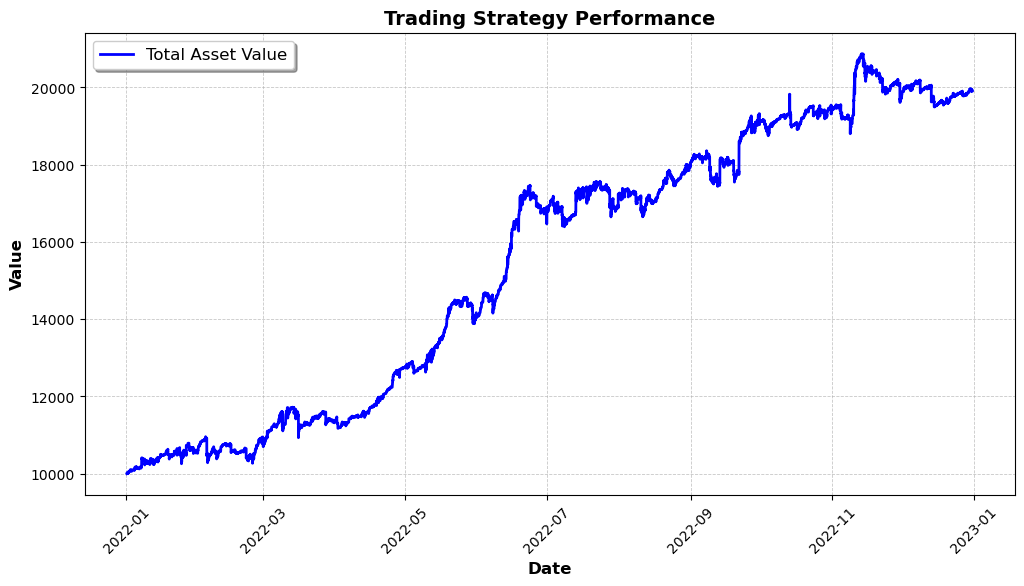

In [403]:
picture.plot_trading_performance(df_result)

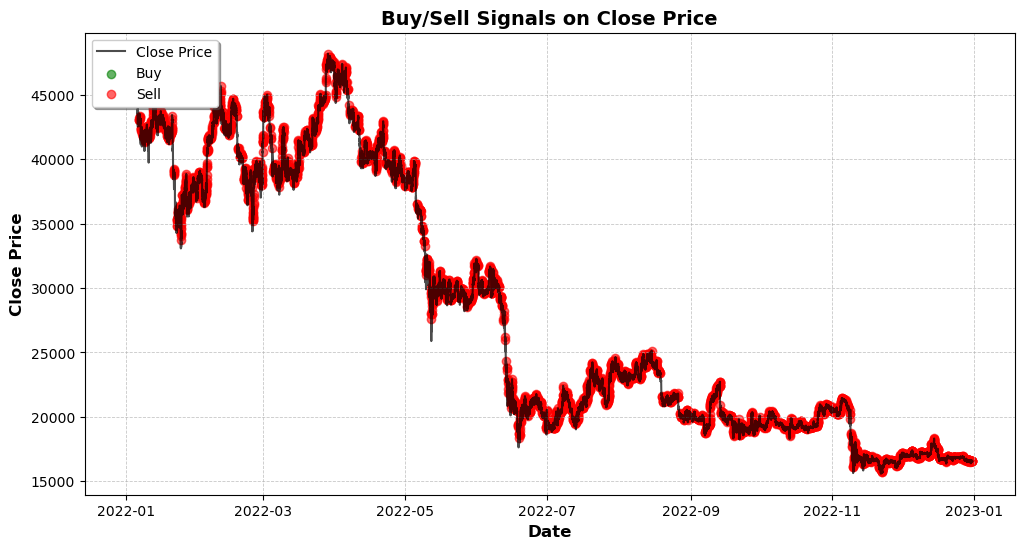

In [412]:
picture.plot_buy_sell_signals(BTC, series_position_long_short)

- The **best-performing indicator in 2022 was likely short-biased**, benefiting from the **downward market trend**.
- The **BTC price chart shows a consistent decline**, aligning with the effectiveness of short signals.
- In the **latter half of the year**, when the market **stabilized and no longer trended down**, the **indicator's performance dropped**.
- The **trading strategy's cumulative return plateaued** as the market **lost its clear downward momentum**.

**Conclusion:** The indicator's **success depended on market conditions**. It performed well in a **bear market** but struggled **when the trend weakened**. 

In [498]:
def generate_trading_signal(category, factor_name, factor_values, corr_value, is_numerical, upper_quantile=None, lower_quantile=None):
    """
    Generates trading signals based on whether the factor is numerical or categorical.

    Parameters:
    - category: Category of the factor.
    - factor_name: Name of the factor.
    - factor_values: Series containing factor values.
    - corr_value: Correlation of the factor with the target revenue factor.
    - is_numerical: Boolean indicating if the factor is numerical.
    - upper_quantile: Upper quantile threshold for numerical factors (required if is_numerical=True).
    - lower_quantile: Lower quantile threshold for numerical factors (required if is_numerical=True).

    Returns:
    - A DataFrame containing trading signals with properly named columns.
    """
    if is_numerical:
        if upper_quantile is None or lower_quantile is None:
            raise ValueError("Upper and lower quantiles must be provided for numerical factors.")
        
        # Compute quantile thresholds
        upper_threshold = factor_values.quantile(upper_quantile)
        lower_threshold = factor_values.quantile(lower_quantile)

        # Assign signals: 1 for buy, -1 for sell, 0 for neutral
        signal = np.where(
            factor_values > upper_threshold, 1,  # Buy signal
            np.where(factor_values < lower_threshold, -1, 0)  # Sell and Neutral signals
        )
    else:
        # Process categorical data
        unique_vals_sorted = sorted(factor_values.dropna().unique())
        unique_count = len(unique_vals_sorted)

        # Assign signals based on unique count
        if unique_count == 2:
            signal_map = {unique_vals_sorted[0]: 0, unique_vals_sorted[1]: 1}
        elif unique_count == 3:
            signal_map = {unique_vals_sorted[0]: 0, unique_vals_sorted[1]: 1, unique_vals_sorted[2]: -1}
        elif unique_count == 5:
            signal_map = {unique_vals_sorted[0]: 0, unique_vals_sorted[1]: 1, unique_vals_sorted[2]: -1,
                          unique_vals_sorted[3]: 1, unique_vals_sorted[4]: -1}
        else:
            signal_map = {val: 0 for val in unique_vals_sorted}  # Default neutral mapping for unsupported cases

        signal = factor_values.map(signal_map).fillna(0)

    # Adjust signal direction based on correlation sign
    if corr_value < 0:
        signal = -signal

    # Create a DataFrame with proper column names
    trading_signals_df = pd.DataFrame(signal, index=factor_values.index, columns=[(category, factor_name)])
    trading_signals_df.columns = pd.MultiIndex.from_tuples(trading_signals_df.columns, names=["Category", "Factor"])

    return trading_signals_df

# Example usage:
category, factor_name = "Momentum Indicators", "MACD"
trading_signals_df = generate_trading_signal(category, factor_name, df_extended[(category, factor_name)], factor_correlations.loc[(category, factor_name),("Revenue", "Future 5m Return")], is_numerical=True, upper_quantile=0.75, lower_quantile=0.25)


In [475]:
def generate_signals_for_top_factors(top_20_results, factor_correlations, df_extended, corr_threshold=0.7):
    """
    Generates trading signals for each factor listed in the top_20_results DataFrame
    and removes highly correlated signals.

    Parameters:
    - top_20_results: DataFrame containing the best-performing factors with their quantiles.
    - df_extended: DataFrame containing the original factor data.
    - corr_threshold: Threshold for filtering out highly correlated factors.

    Returns:
    - A DataFrame containing trading signals for the selected factors.
    """
    trading_signals_dict = {}

    for _, row in top_20_results.iterrows():
        category = row["level_2"]
        factor_name = row["level_3"]
        upper_quantile = row["Upper Quantile"]
        lower_quantile = row["Lower Quantile"]
        sharpe_ratio = row["Sharpe Ratio"]  # Used for ranking if needed

        # Check if factor exists in df_extended
        if (category, factor_name) in df_extended.columns:
            factor_values = df_extended[(category, factor_name)]
            is_numerical = factor_values.dtype.kind in 'fi'  # Check if the column is numerical
            corr_value = factor_correlations.loc[(category, factor_name),("Revenue", "Future 5m Return")]

            # Generate trading signals
            trading_signals_df = generate_trading_signal(
                category, factor_name, factor_values, corr_value=corr_value,  # Placeholder correlation
                is_numerical=is_numerical, upper_quantile=upper_quantile, lower_quantile=lower_quantile
            )

            # Store result
            trading_signals_dict[(category, factor_name)] = trading_signals_df

    # Concatenate trading signals into a DataFrame
    if trading_signals_dict:
        trading_signals_df = pd.concat(trading_signals_dict.values(), axis=1)
        trading_signals_df.columns = pd.MultiIndex.from_tuples(trading_signals_dict.keys(), names=["Category", "Factor"])
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no signals are generated

    # Compute correlation matrix of trading signals
    corr_df = trading_signals_df.corr()

    # Remove highly correlated factors
    final_selected_factors = set(trading_signals_df.columns)
    for factor_a in trading_signals_df.columns:
        for factor_b in trading_signals_df.columns:
            if factor_a != factor_b and factor_a in final_selected_factors and factor_b in final_selected_factors:
                if abs(corr_df.loc[factor_a, factor_b]) > corr_threshold:
                    # Remove the lower Sharpe Ratio factor
                    sharpe_a = top_20_results[(top_20_results["level_2"] == factor_a[0]) & (top_20_results["level_3"] == factor_a[1])]["Sharpe Ratio"].values[0]
                    sharpe_b = top_20_results[(top_20_results["level_2"] == factor_b[0]) & (top_20_results["level_3"] == factor_b[1])]["Sharpe Ratio"].values[0]
                    if sharpe_a > sharpe_b:
                        final_selected_factors.discard(factor_b)
                    else:
                        final_selected_factors.discard(factor_a)

    # Filter final trading signals
    trading_signals_df = trading_signals_df[list(final_selected_factors)]

    return trading_signals_df

# **Run the function**
trading_signals_df = generate_signals_for_top_factors(top_20_results,factor_correlations, df_extended)


In [452]:
# Select the top 6 categorical factors based on Sharpe Ratio
top_6_categorical_factors = top_factors_categorical_filtered.sort_values(by='Sharpe Ratio', ascending=False).index[:6]

# Extract the selected categorical trading signals
top_categorical_signals = trading_signals_categorical_df[top_6_categorical_factors]

# Concatenate numerical and categorical signals
combined_signals_df = pd.concat([trading_signals_df, top_categorical_signals], axis=1)

# Compute the sum of all signals across factors for each timestamp
combined_signals_df['Sum_Signals'] = combined_signals_df.sum(axis=1)

In [454]:
# Apply strategies
series_position_long_short = long_short_strategy(combined_signals_df['Sum_Signals'])

df_result = calculate_cumulative_asset(BTC["close"], series_position_long_short, fee_rate=0.0002)

evaluate_strategy(df_result, risk_free_rate=0.0)

{'Sharpe Ratio': 3.47330051371227,
 'Max Drawdown (%)': -6.782331051351321,
 'Holding Win Rate (%)': 5.9717439209364,
 'Trading Win Rate (%)': 47.591933570581254,
 'Final Cumulative Return (%)': 53.51797908579117,
 'Turnover (%)': 43.19}

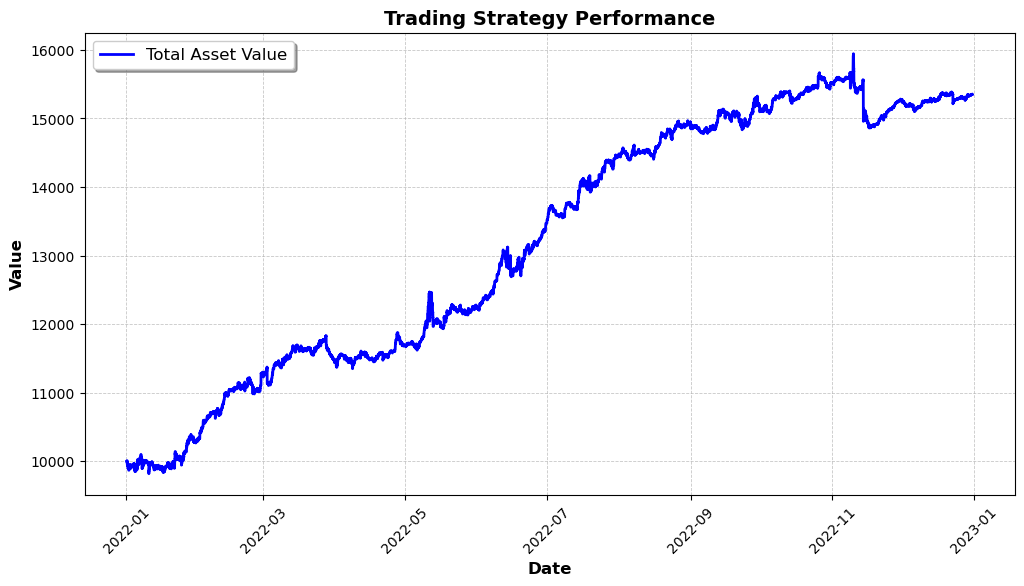

In [455]:
picture.plot_trading_performance(df_result)

This chart demonstrates the performance of a trading strategy that combines multiple high-performing factors. Compared to single-factor strategies, the combined approach results in a more stable return curve with reduced drawdowns. However, there are several key considerations to keep in mind:

1. **Overfitting Risk** – The strong historical performance may be a result of fitting the model to past data rather than capturing a truly robust pattern. Future market conditions could render some of these factors ineffective.

2. **Market Regime Changes** – Factors perform differently in various market environments. For example, momentum indicators work well in trending markets, while mean-reversion factors may be more effective in range-bound conditions. The strategy should account for shifting market dynamics.

3. **Dynamic Factor Selection** – Incorporating a rolling window or machine learning approach could help adaptively select the best factors over time, ensuring the strategy remains effective as market conditions evolve.

4. **Risk Control** – While combining factors reduces the volatility of a single-factor approach, highly correlated factors could lead to simultaneous failure under certain market conditions. A proper risk management framework is necessary.

## Strategy Improvement (Detrend)

In [457]:
window_size = 15000  
moving_avg = BTC.rolling(window=window_size).mean()
detrended_series = BTC - moving_avg
detrended_series = detrended_series.dropna()

df_indicators_detrend = factors.compute_technical_indicators(detrended_series, start, end)
df_indicators_detrend = factors.restructure_dataframe(df_indicators_detrend)

In [461]:
def compute_future_returns(df, BTC, future_intervals=[5, 10, 15, 20, 25, 30]):

    # Compute future returns and store in a dictionary
    future_returns = {
        f"Future {interval}m Return": BTC["close"].pct_change(periods=interval).shift(-interval) for interval in future_intervals
    }

    # Convert the dictionary to a DataFrame with MultiIndex columns
    future_returns_df = pd.DataFrame(future_returns, index=df.index)
    future_returns_df.columns = pd.MultiIndex.from_tuples(
        [("Revenue", col) for col in future_returns_df.columns], names=["Category", "Factor"]
    )

    # Concatenate the original DataFrame with the new future return columns
    df_extended = pd.concat([df, future_returns_df], axis=1)

    return df_extended

df_extended = compute_future_returns(df_indicators_detrend, BTC)
revenue_columns = [col for col in df_extended.columns if col[0] == "Revenue"]
factor_correlations = df_extended.corr().loc[:, revenue_columns].drop(index=revenue_columns)


In [463]:
# Define quantile search space
quantile_range = [0.75, 0.85, 0.9, 0.93, 0.95, 0.97, 0.99, 0.995]

# Dictionary to store results for each quantile setting
quantile_results = {}
quantile_plot_results = {}

best_avg_sharpe = -np.inf
best_quantiles = None
best_results_df = None

# Iterate over quantile pairs externally
for upper_quantile in quantile_range:
    lower_quantile = 1 - upper_quantile  # Ensure symmetry
    if lower_quantile >= upper_quantile:
        continue  # Ensure lower quantile is less than upper quantile

    # Evaluate the strategy for the current quantile pair
    results_df, avg_sharpe = evaluate_quantile_performance(
        df_extended, factor_correlations, numerical_columns, BTC, upper_quantile, lower_quantile
    )

    # Store results
    quantile_results[(upper_quantile, lower_quantile)] = results_df
    quantile_plot_results[upper_quantile] = avg_sharpe

    # Update best quantiles if this setting improves the Sharpe ratio
    if avg_sharpe > best_avg_sharpe:
        best_avg_sharpe = avg_sharpe
        best_quantiles = (upper_quantile, lower_quantile)
        best_results_df = results_df

# Convert dictionary into a structured DataFrame
quantile_results_df = pd.concat(quantile_results, names=["Upper Quantile", "Lower Quantile"])
quantile_results_df.reset_index(inplace=True)

In [464]:
quantile_results_df.to_csv('detrend_numerical_performance.csv')

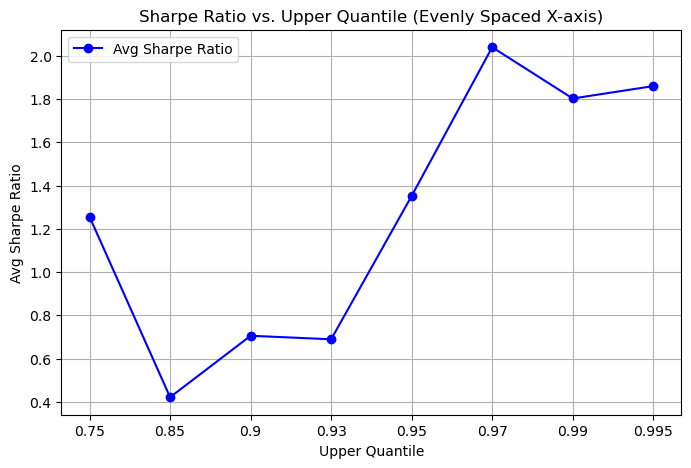

In [465]:
picture.plot_quantile_vs_sharpe(quantile_plot_results)

In [466]:
# Rank by Sharpe Ratio in descending order
ranked_results = quantile_results_df.sort_values(by="Sharpe Ratio", ascending=False)

# Keep only the top 20 highest Sharpe Ratio entries
top_20_results = ranked_results.head(20)

# Remove duplicates based on "Level 3" (keeping the highest Sharpe Ratio)
top_20_results = top_20_results.sort_values(by="Sharpe Ratio", ascending=False).drop_duplicates(subset=["level_3"], keep="first")

In [467]:
top_20_results

,Upper Quantile,Lower Quantile,level_2,level_3,Sharpe Ratio,Max Drawdown (%),Holding Win Rate (%),Trading Win Rate (%),Final Cumulative Return (%),Turnover (%)
303,0.990,0.010,Momentum Indicators,MOM1,2.537280,-7.859295,1.906999,55.586018,64.280559,17.98
237,0.970,0.030,Overlap Studies,H TRENDLINE,2.397684,-15.567579,3.056987,93.333333,70.995030,53.86
238,0.970,0.030,Overlap Studies,T,2.089092,-15.919064,3.048081,83.870968,59.752901,53.84
321,0.990,0.010,Momentum Indicators,TRIX,1.746633,-6.908711,1.064268,62.500000,20.732151,17.96
193,0.950,0.050,Momentum Indicators,ADX20,1.639122,-8.463343,5.461610,54.500000,30.982015,89.80
361,0.995,0.005,Momentum Indicators,RSI5,1.573366,-10.169519,0.816013,67.640919,17.047944,9.00
241,0.970,0.030,Momentum Indicators,ADXR,1.564260,-9.304956,3.315262,51.508121,22.899219,53.88
46,0.750,0.250,Cycle Indicators,HT DCPHASE,1.483317,-22.936918,28.285482,40.489460,64.199531,448.82
43,0.750,0.250,Volatility Indicators,NATR,1.296577,-31.420605,25.360972,59.082218,55.739581,449.06
345,0.995,0.005,Momentum Indicators,MACD,1.169040,-9.592309,0.554399,68.888889,18.322520,8.98


In [476]:
trading_signals_df_numerical = generate_signals_for_top_factors(top_20_results, factor_correlations, df_extended)

In [499]:
trading_signals_list = []
strategy_evaluation_results_categorical = {}

for category, name in categorical_columns:
    corr_value = factor_correlations.loc[(category, name),("Revenue", "Future 5m Return")]
    signal_df = generate_trading_signal(category, name, df_extended[(category, name)],corr_value, is_numerical=False)
    trading_signals_list.append(signal_df)
    
    # Calculate the cumulative asset value
    df_result = calculate_cumulative_asset(BTC["close"], signal_df.dropna())

    # Evaluate the strategy and store results
    evaluation_metrics = evaluate_strategy(df_result, risk_free_rate=0.0)
    strategy_evaluation_results_categorical[(category, name)] = evaluation_metrics
    

In [500]:
trading_signals_df_categorical = pd.concat(trading_signals_list, axis=1)
trading_performance_df_categorical = pd.DataFrame(strategy_evaluation_results_categorical)

In [520]:
# Select the top 6 categorical factors based on Sharpe Ratio
top_6_categorical_factors = trading_performance_df_categorical.T.sort_values(by='Sharpe Ratio', ascending=False).index[:3]

# Extract the selected categorical trading signals
top_categorical_signals = trading_signals_df_categorical[top_6_categorical_factors]

# Concatenate numerical and categorical signals
combined_signals_df = pd.concat([trading_signals_df, top_categorical_signals], axis=1)

# Compute the sum of all signals across factors for each timestamp
combined_signals_df['Sum_Signals'] = combined_signals_df.sum(axis=1)

In [521]:
# Apply strategies
series_position_long_short = long_short_strategy(combined_signals_df['Sum_Signals'])

df_result = calculate_cumulative_asset(BTC["close"], series_position_long_short, fee_rate=0.0002)

evaluate_strategy(df_result, risk_free_rate=0.0)

{'Sharpe Ratio': 3.8738010267185454,
 'Max Drawdown (%)': -6.6419890527196825,
 'Holding Win Rate (%)': 6.1518251750587245,
 'Trading Win Rate (%)': 62.21735959153902,
 'Final Cumulative Return (%)': 99.38387074588817,
 'Turnover (%)': 51.67}

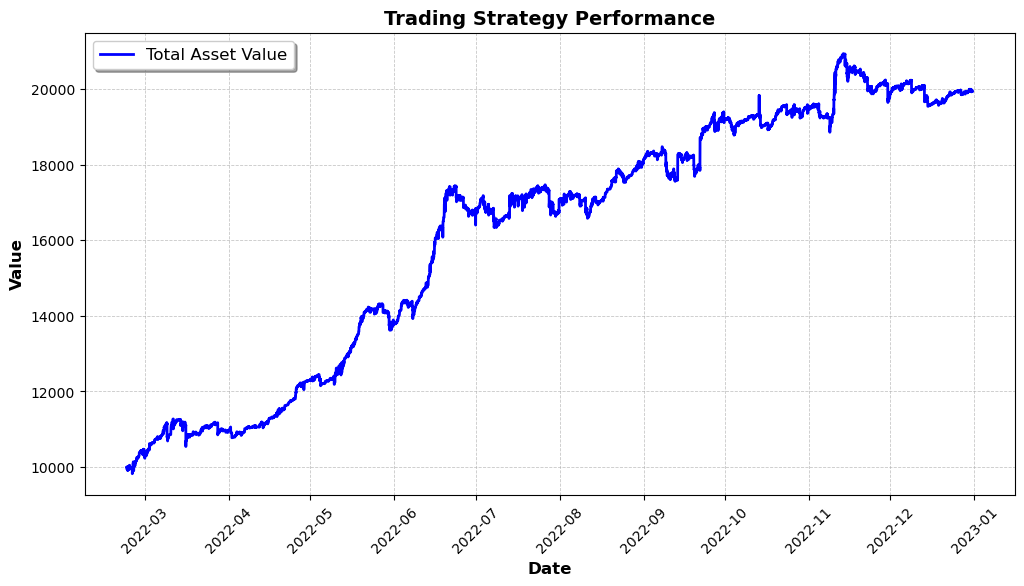

In [522]:
picture.plot_trading_performance(df_result)

## Strategy Improvement (Volatility Adjusted)

In [532]:
def realized_volatility(prices, window=5*24*12):
    log_returns = np.log(prices / prices.shift(1)) 
    rolling_vol = log_returns.rolling(window=window).std() *100
    return rolling_vol

BTC["volatility"] = realized_volatility(BTC["close"])

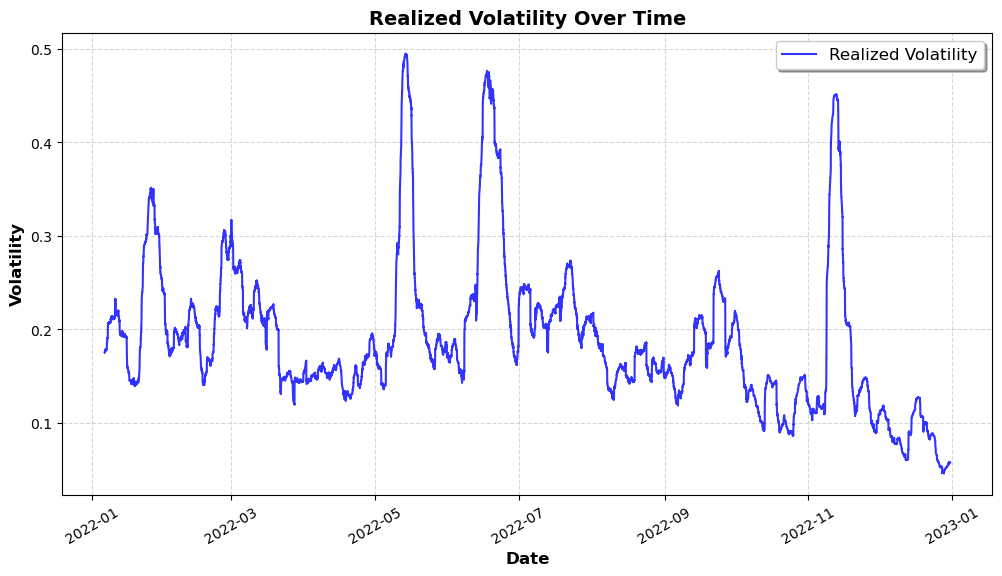

In [536]:
picture.plot_realized_volatility(BTC)

This chart illustrates the realized volatility over time, showing periods of both high and low market volatility. Based on previous research, I observed that the top-performing indicators tend to work best in trending markets, where price movements are more directional. However, when the market experiences small-scale fluctuations (low volatility), the strategy’s returns are often insufficient to cover trading costs.

To address this issue, I aim to adjust my strategy dynamically based on volatility levels. Specifically:
- **During high-volatility periods**, the strategy can remain active, as trends are more pronounced, and the indicators perform well.
- **During low-volatility periods**, the strategy should reduce position openings to avoid excessive trading in choppy, non-directional markets, where the cost of execution outweighs the potential returns.

This adjustment helps to optimize risk management and improve the overall efficiency of the strategy.

In [523]:
window_size = 15000  
moving_avg = BTC.rolling(window=window_size).mean()
detrended_series = BTC - moving_avg
detrended_series = detrended_series.dropna()

df_indicators_detrend = factors.compute_technical_indicators(detrended_series, start, end)
df_indicators_detrend = factors.restructure_dataframe(df_indicators_detrend)

In [587]:
df_indicators_notrend = factors.compute_technical_indicators(BTC, start, end)
df_indicators_notrend = factors.restructure_dataframe(df_indicators_notrend)

In [595]:
def compute_future_returns(df, BTC, future_intervals=[5, 10, 15, 20, 25, 30]):

    # Compute future returns and store in a dictionary
    future_returns = {
        f"Future {interval}m Return": BTC["close"].pct_change(periods=interval).shift(-interval) for interval in future_intervals
    }

    # Convert the dictionary to a DataFrame with MultiIndex columns
    future_returns_df = pd.DataFrame(future_returns, index=df.index)
    future_returns_df.columns = pd.MultiIndex.from_tuples(
        [("Revenue", col) for col in future_returns_df.columns], names=["Category", "Factor"]
    )

    # Concatenate the original DataFrame with the new future return columns
    df_extended = pd.concat([df, future_returns_df], axis=1)

    return df_extended

df_extended = compute_future_returns(df_indicators_detrend, BTC)
revenue_columns = [col for col in df_extended.columns if col[0] == "Revenue"]
factor_correlations = df_extended.corr().loc[:, revenue_columns].drop(index=revenue_columns)

In [596]:
def generate_numerical_signal(category, factor_name, factor_values, corr_value, quantile_levels):
    if quantile_levels is None:
        raise ValueError("Quantile levels must be provided for numerical factors.")

    # Compute quantile thresholds
    quantiles = factor_values.quantile(quantile_levels).values

    # Generate signals based on quantiles
    signal = np.select(
        [
            factor_values >= quantiles[-1],  # Top 10%
            (factor_values >= quantiles[-2]) & (factor_values < quantiles[-1]),
            (factor_values >= quantiles[-3]) & (factor_values < quantiles[-2]),
            (factor_values >= quantiles[-4]) & (factor_values < quantiles[-3]),
            (factor_values >= quantiles[-5]) & (factor_values < quantiles[-4]),
            (factor_values >= quantiles[-6]) & (factor_values < quantiles[-5]),
            (factor_values >= quantiles[-7]) & (factor_values < quantiles[-6]),
            (factor_values >= quantiles[-8]) & (factor_values < quantiles[-7]),
            (factor_values >= quantiles[-9]) & (factor_values < quantiles[-8]),
            (factor_values >= quantiles[0]) & (factor_values < quantiles[-9]),
            factor_values < quantiles[0]  # Bottom 10%
        ],
        [5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5]
    )

    # Adjust signal direction based on correlation sign
    if corr_value < 0:
        signal = -signal

    # Create a DataFrame with proper column names
    trading_signals_df = pd.DataFrame(signal, index=factor_values.index, columns=[(category, factor_name)])
    trading_signals_df.columns = pd.MultiIndex.from_tuples(trading_signals_df.columns, names=["Category", "Factor"])

    return trading_signals_df

def generate_categorical_signal(category, factor_name, factor_values, corr_value):
    unique_vals_sorted = sorted(factor_values.dropna().unique())
    unique_count = len(unique_vals_sorted)

    # Assign signals based on unique count
    if unique_count == 2:
        signal_map = {unique_vals_sorted[0]: 0, unique_vals_sorted[1]: 5}
    elif unique_count == 3:
        signal_map = {unique_vals_sorted[0]: 0, unique_vals_sorted[1]: 5, unique_vals_sorted[2]: -5}
    elif unique_count == 5:
        signal_map = {unique_vals_sorted[0]: 0, unique_vals_sorted[1]: 1, unique_vals_sorted[2]: -1,
                      unique_vals_sorted[3]: 5, unique_vals_sorted[4]: -5}
    else:
        signal_map = {val: 0 for val in unique_vals_sorted}  # Default neutral mapping for unsupported cases

    signal = factor_values.map(signal_map).fillna(0)

    # Adjust signal direction based on correlation sign
    if corr_value < 0:
        signal = -signal

    # Create a DataFrame with proper column names
    trading_signals_df = pd.DataFrame(signal, index=factor_values.index, columns=[(category, factor_name)])
    trading_signals_df.columns = pd.MultiIndex.from_tuples(trading_signals_df.columns, names=["Category", "Factor"])

    return trading_signals_df


In [628]:
# Define quantile levels for numerical signals
quantile_levels = [0.005, 0.01, 0.02, 0.03, 0.05, 0.95, 0.97, 0.98, 0.99, 0.995]

# Dictionary to store generated signals
trading_signals_dict = {}

# Iterate through columns in df_indicators_detrend
for (category, factor_name) in df_indicators_detrend.columns:
    factor_values = df_indicators_detrend[(category, factor_name)]
    corr_value = factor_correlations.loc[(category, factor_name),("Revenue", "Future 5m Return")]
    
    # Determine whether it's numerical or categorical
    unique_count = factor_values.nunique()
    
    if unique_count > 5:
        # Numerical factor → Use quantiles
        signal_df = generate_numerical_signal(category, factor_name, factor_values, corr_value=corr_value, quantile_levels=quantile_levels)
    
    else:
        # Categorical factor → Use predefined mapping
        signal_df = generate_categorical_signal(category, factor_name, factor_values, corr_value=corr_value)

    # Store the result
    trading_signals_dict[(category, factor_name)] = signal_df

# Convert dictionary to a DataFrame
trading_signals_df = pd.concat(trading_signals_dict.values(), axis=1)

# Assign proper MultiIndex columns
trading_signals_df.columns = pd.MultiIndex.from_tuples(trading_signals_dict.keys(), names=["Category", "Factor"])


In [629]:
strategy_evaluation_results = {}

df_vol = BTC["volatility"].copy()
# Evaluate categorical factor strategies
for (category, factor_name) in trading_signals_df.columns:
    # Get the trading signal series for the factor
    series_position_long_short = vol_long_short_strategy(trading_signals_df[category][factor_name],df_vol)

    # Calculate the cumulative asset value
    df_result = calculate_cumulative_asset(BTC["close"], series_position_long_short)

    # Evaluate the strategy and store results
    evaluation_metrics = evaluate_strategy(df_result, risk_free_rate=0.0)
    strategy_evaluation_results[(category, factor_name)] = evaluation_metrics

# Convert the results dictionaries into structured DataFrames
evaluation_results_df = pd.DataFrame(strategy_evaluation_results).T
evaluation_results_df.columns = ["Sharpe Ratio", "Max Drawdown (%)", "Holding Win Rate (%)", 
                                           "Trading Win Rate (%)", "Final Cumulative Return (%)", "Turnover (%)"]

In [630]:
# Select the top 30 factors based on Sharpe Ratio
top_30_factors = evaluation_results_df.sort_values(by="Sharpe Ratio", ascending=False).head(30)

In [631]:
top_30_factors

Sharpe Ratio  Max Drawdown (%)  \
Overlap Studies     BBAND UPPER SIGNAL      3.631708         -6.909779   
                    TRIMA                   2.780170        -14.869983   
                    T                       2.779438        -14.464705   
                    EMA                     2.737302        -14.575688   
                    H TRENDLINE             2.632710        -14.219548   
                    SMA20                   2.627234        -14.240853   
                    KMAM                    2.572834        -15.048693   
                    DEMA                    2.538901        -15.724864   
                    SMA5                    2.498106        -15.503855   
                    TEMA                    2.449271        -17.151997   
                    SMA3                    2.433993        -15.879506   
                    WMA                     2.337560        -14.575688   
                    MIDPRICE                2.312774        -14.788811   
                    MIDPOINT                2.270475        -14.621280   
                    SMA10                   2.240558        -16.140962   
                    SAREXT                  2.101510        -14.575688   
                    SAR                     2.101510        -14.575688   
Pattern Recognition DLCONCEALBABYSWALL      1.729650         -0.022505   
                    CDLEVENINGDOJISTAR      1.673422        -26.294310   
                    CDLTASUKIGAP            1.637192        -29.402469   
                    DLABANDONEDBABY         1.633972        -26.294310   
Momentum Indicators ADX14                   1.608475        -10.875342   
Pattern Recognition CDLUNIQUE3RIVER         1.600573         -0.318809   
Momentum Indicators MOM1                    1.568488        -32.522210   
Pattern Recognition CDL3LINESTRIKE          1.548228        -30.313945   
                    CDL2CROWS               1.547927        -27.839407   
                    CDLINNECK               1.518928        -29.133843   
                    CDL3OUTSIDE             1.507699        -33.120478   
                    CDLHANGINGMAN           1.499795        -31.139038   
                    CDLLONGLINE             1.496886        -34.850623   

                                        Holding Win Rate (%)  \
Overlap Studies     BBAND UPPER SIGNAL              5.981498   
                    TRIMA                           2.196444   
                    T                               2.194218   
                    EMA                             2.227615   
                    H TRENDLINE                     2.207577   
                    SMA20                           2.203124   
                    KMAM                            2.190878   
                    DEMA                            2.209803   
                    SMA5                            2.216483   
                    TEMA                            2.212030   
                    SMA3                            2.233182   
                    WMA                             2.200897   
                    MIDPRICE                        2.217596   
                    MIDPOINT                        2.194218   
                    SMA10                           2.199784   
                    SAREXT                          2.246541   
                    SAR                             2.246541   
Pattern Recognition DLCONCEALBABYSWALL              0.005566   
                    CDLEVENINGDOJISTAR             49.135561   
                    CDLTASUKIGAP                   49.142240   
                    DLABANDONEDBABY                49.137787   
Momentum Indicators ADX14                           2.784241   
Pattern Recognition CDLUNIQUE3RIVER                 0.032284   
Momentum Indicators MOM1                            4.346132   
Pattern Recognition CDL3LINESTRIKE                 49.153373   
                    CDL2CROWS                      49.146693   
                 

Based on previous experiments, we aim to ensure that the buy and sell signals determined by the quantile selection are as few as possible. After multiple tests, when setting `quantile_levels = [0.005, 0.01, 0.02, 0.03, 0.05, 0.95, 0.97, 0.98, 0.99, 0.995]`, the turnover is approximately similar to that of the category indicators.

In [567]:
series_position_long_short = vol_long_short_strategy(trading_signals_df["Overlap Studies"]["BBAND UPPER SIGNAL"],df_vol)
df_result = calculate_cumulative_asset(BTC["close"], series_position_long_short)

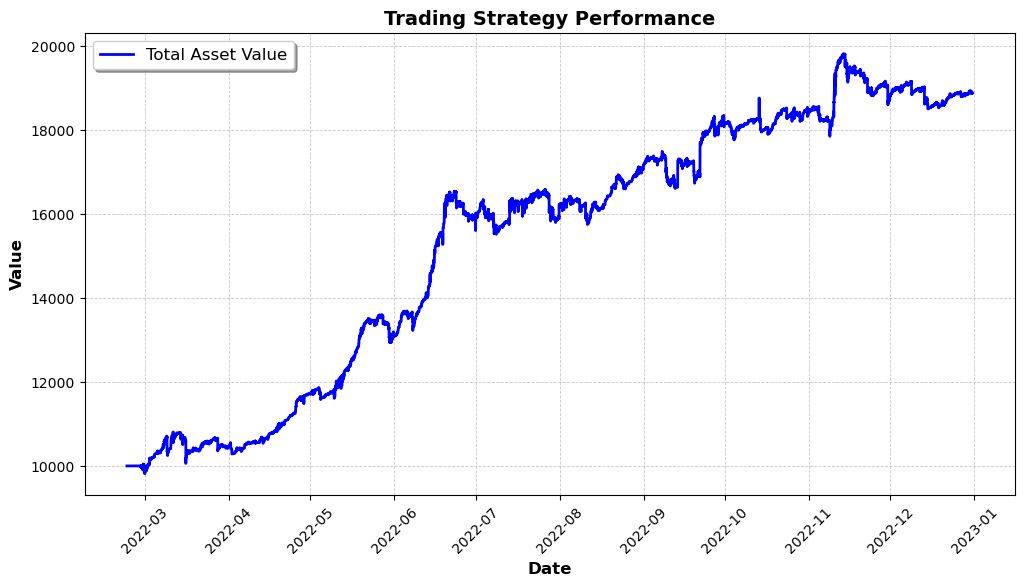

In [569]:
picture.plot_trading_performance(df_result)

In [632]:
# Set to store factors that should be removed
factors_to_remove = set()
top_30_factors_index = top_30_factors.index
top_30_factors_corr = trading_signals_df[top_30_factors_index].corr()

# Iterate over the correlation matrix to find highly correlated factors
for i in range(len(top_30_factors_index)):
    for j in range(i + 1, len(top_30_factors_index)):
        factor1 = top_30_factors_index[i]
        factor2 = top_30_factors_index[j]

        # Ensure both factors exist in the correlation matrix
        if factor1 in top_30_factors_corr.index and factor2 in top_30_factors_corr.columns:
            # If correlation is greater than 0.7, remove the lower-ranked factor
            if top_30_factors_corr.loc[factor1, factor2] > 0.7:
                factors_to_remove.add(factor2)

# Filter the top factors index to exclude highly correlated ones
filtered_top_30_factors_index = [factor for factor in top_30_factors_index if factor not in factors_to_remove]

In [633]:
filtered_top_30_factors_index

[('Overlap Studies', 'BBAND UPPER SIGNAL'),
 ('Overlap Studies', 'TRIMA'),
 ('Pattern Recognition', 'DLCONCEALBABYSWALL'),
 ('Pattern Recognition', 'CDLEVENINGDOJISTAR'),
 ('Pattern Recognition', 'CDLTASUKIGAP'),
 ('Pattern Recognition', 'DLABANDONEDBABY'),
 ('Momentum Indicators', 'ADX14'),
 ('Pattern Recognition', 'CDLUNIQUE3RIVER'),
 ('Momentum Indicators', 'MOM1'),
 ('Pattern Recognition', 'CDL3LINESTRIKE'),
 ('Pattern Recognition', 'CDL2CROWS'),
 ('Pattern Recognition', 'CDLINNECK'),
 ('Pattern Recognition', 'CDL3OUTSIDE'),
 ('Pattern Recognition', 'CDLHANGINGMAN'),
 ('Pattern Recognition', 'CDLLONGLINE')]

In [654]:
# Select signals from the filtered top 30 factors
valid_factors = [factor for factor in filtered_top_30_factors_index[:3] if factor in trading_signals_df.columns]
selected_signals = trading_signals_df[valid_factors]

# Sum all selected signals to create an aggregated signal
aggregated_signal = selected_signals.sum(axis=1)

# Define threshold for long and short positions
long_threshold = aggregated_signal.quantile(0.9)  # Upper 75% quantile
short_threshold = aggregated_signal.quantile(0.1)  # Lower 25% quantile

# Generate final trading signal: 1 for long, -1 for short, 0 for neutral
final_trading_signal = np.where(
    aggregated_signal > 1, 1,  # Long position
    np.where(aggregated_signal < -1, -1, 0)  # Short and neutral positions
)

# Convert to DataFrame
final_trading_signal_df = pd.DataFrame(final_trading_signal, index=trading_signals_df.index, columns=["Final Signal"])

In [655]:
# Apply strategies
series_position_long_short = long_short_strategy(final_trading_signal_df['Final Signal'])

df_result = calculate_cumulative_asset(BTC["close"], series_position_long_short)

evaluate_strategy(df_result, risk_free_rate=0.0)

{'Sharpe Ratio': 3.9609002384581014,
 'Max Drawdown (%)': -16.194841968306076,
 'Holding Win Rate (%)': 8.757945829205028,
 'Trading Win Rate (%)': 62.48091603053435,
 'Final Cumulative Return (%)': 200.39778308967544,
 'Turnover (%)': 101.84}

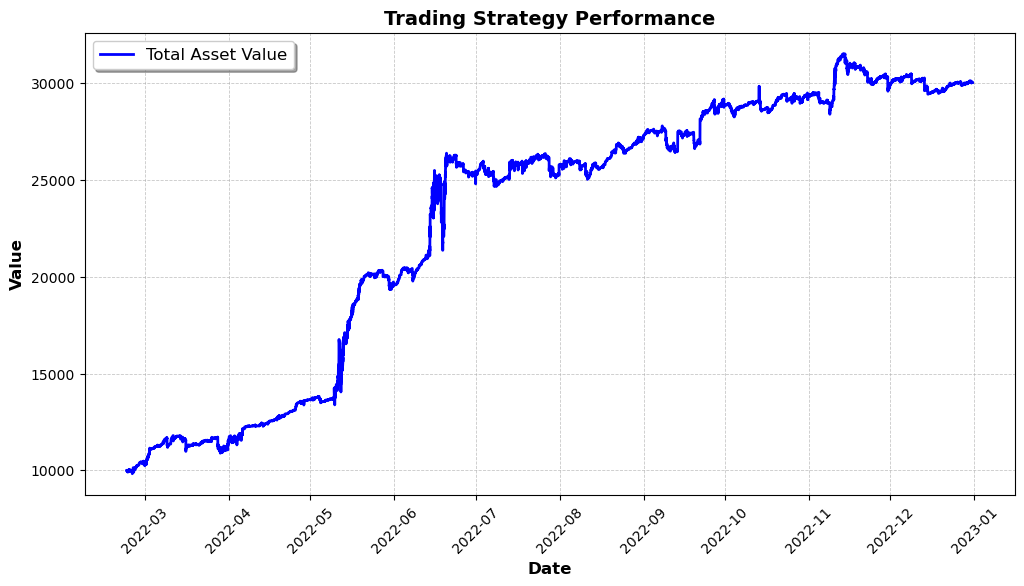

In [656]:
picture.plot_trading_performance(df_result)

### Summary

The analysis demonstrates that incorporating **historical return volatility for risk control** and **detrending methods for factor construction** significantly improves strategy performance.

1. **First Image (Best Performance - Volatility Control + Detrending)**
   - The first approach integrates **risk control using historical volatility** and **detrending of factors**. 
   - This results in a **smoother equity curve**, fewer large drawdowns, and more **stable upward growth**.
   - The use of volatility control helps avoid overtrading in **high-noise periods**, while detrending improves signal clarity.

2. **Second Image (Improved Performance - Detrending Only)**
   - This method **only applies detrending** to factor construction, without using volatility-based risk management.
   - Compared to the original strategy, the performance is **visibly better**, with improved returns and reduced drawdowns.
   - However, the lack of risk control leads to more **volatile performance swings**, suggesting potential overtrading during noisy markets.

3. **Third Image (Baseline Strategy - No Adjustments)**
   - The **original strategy** suffers from **sharper drawdowns** and **less stable** performance.
   - Without detrending, factor signals may be **distorted by long-term trends**, leading to lower accuracy.
   - Additionally, without volatility-based risk control, the strategy **trades aggressively even in unfavorable conditions**, leading to increased drawdowns.

### Key Insights & Takeaways:
- **Detrending improves factor robustness** by removing long-term biases and making signals more responsive to market shifts.
- **Volatility-based risk control stabilizes performance**, reducing unnecessary trades in noisy market conditions.
- The best results are achieved when **both techniques are applied together**, balancing **factor signal strength** with **adaptive risk control**.

This suggests that **future improvements** could include:
- **Dynamic volatility-based position sizing** (adapting exposure based on current market conditions).
- **Adaptive threshold selection for detrending** (to better align with changing market regimes).
- **Regime-switching models** to adjust between **trend-following** and **mean-reversion** strategies based on volatility conditions.